<a href="https://colab.research.google.com/github/LoznianuAnamaria/challenges/blob/main/Github%20Activity%20-%3E%20Token%20Trend/GithubActivity_TokenPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import json
import re
import pandas as pd
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', message='Converting to PeriodArray/Index representation will drop timezone information.')


In [95]:
projects = [{"oceanprotocol": "Ocean Protocol"},
            {"numerai": "Numerai"},
            {"oraichain": "Oraichain"},
            {"fetchai": "Fetch.AI"},
            {"bittensor": "Bittensor"},
            {"singularitynet": "SingularityNET"}]

input_dir = 'input'
output_dir = 'output'

# Process repos

In [96]:
# Define the list of fields to extract
repo_fields = [
    "id", "name", "description", "language", "archived", "stargazers_count", "default_branch",
    "created_at", "updated_at", "pushed_at",
    "open_issues_count", "forks_count", "size", "watchers_count"
]

# List to hold data from each JSON file
all_data = []

# Iterate over all files in the directory
for json_file in os.listdir(input_dir):
    if json_file.endswith('_repos.json'):
        # Load the JSON file
        with open(os.path.join(input_dir, json_file), 'r') as f:
            data = json.load(f)

        # Extract the project name from the file name
        project_name = json_file.split('_repos')[0]

        # Extract the relevant data and add the project name
        for repo in data:
            repo_info = {field: repo.get(field) for field in repo_fields}
            repo_info["project"] = project_name
            all_data.append(repo_info)

# Create a DataFrame with all the extracted data
repos_df = pd.DataFrame(all_data)

# Save the DataFrame to a CSV file
csv_repos_file_path = os.path.join(output_dir, 'repos.csv')
repos_df.to_csv(csv_repos_file_path, index=False)

# Display the first few rows of the DataFrame as a check
repos_df.columns
repos_df.head()


id                 name  \
0  283347912            bittensor   
1  687617114    bittensor-charter   
2  659362425     bittensor-config   
3  618027978  bittensor-delegates   
4  489088380         bittensor-js   

                                         description    language  archived  \
0                     Internet-scale Neural Networks      Python     False   
1                                               None      Python     False   
2  BittensorConfig is a library for managing the ...      Python     False   
3                                               None      Python     False   
4            bittensor api, but for web applications  TypeScript     False   

   stargazers_count default_branch            created_at  \
0               786         master  2020-07-28T23:12:38Z   
1                 6           main  2023-09-05T16:42:38Z   
2                 0           main  2023-06-27T17:05:37Z   
3                 7           main  2023-03-23T15:50:12Z   
4                 1           main  2022-05-05T18:41:02Z   

             updated_at             pushed_at  open_issues_count  forks_count  \
0  2024-05-07T16:32:14Z  2024-05-08T15:24:57Z                 54          240   
1  2024-04-05T22:33:50Z  2023-09-19T02:37:22Z                  1            8   
2  2023-06-27T17:17:24Z  2023-07-26T22:58:58Z                  0            2   
3  2024-05-07T19:50:11Z  2024-05-07T20:12:17Z                 16           54   
4  2023-06-22T01:22:05Z  2022-06-15T19:14:59Z                  0            2   

     size  watchers_count    project  
0  334603             786  bittensor  
1      21               6  bittensor  
2      27               0  bittensor  
3     164               7  bittensor  
4     414               1  bittensor

# Process Prices

In [97]:
# Initialize an empty list to hold the data from each CSV file
all_data = []

# Iterate over all files in the directory
for csv_file in os.listdir(input_dir):
    if csv_file.endswith('_token_price.csv'):
        # Load the CSV file
        file_path = os.path.join(input_dir, csv_file)
        data = pd.read_csv(file_path)

        # Extract the project name from the file name
        project_name = csv_file.split('_token_price')[0]

        # Select and rename the relevant columns
        data = data[['Date', 'Close', 'Volume']]
        data['Project'] = project_name

        # Append the data to the all_data list
        all_data.append(data)

# Concatenate all the data into a single DataFrame
merged_df = pd.concat(all_data, ignore_index=True)

# Reorder the columns to match the desired output
merged_df = merged_df[['Project', 'Date', 'Close', 'Volume']]

# Save the DataFrame to a CSV file
csv_output_file_path = os.path.join(output_dir, 'prices.csv')
merged_df.to_csv(csv_output_file_path, index=False)

# Display the first few rows of the DataFrame as a check
print(merged_df.head())


   Project        Date     Close    Volume
0  fetchai  2019-03-02  0.407747  42849638
1  fetchai  2019-03-03  0.362715  32899379
2  fetchai  2019-03-04  0.335099  37723984
3  fetchai  2019-03-05  0.321447  38616986
4  fetchai  2019-03-06  0.313599  19068167


# Process tweets

tweet_id                                               text  \
0  '1795392784611914134'  We're launching a major initiative to harness ...   
1  '1795019007575134581'  ⏰Last Call! ⏰\n\nThe "GitHub Developer Dynamic...   
2  '1794355218051907812'  New! Slides from my talk on "AI World World Mo...   
3  '1794005441199890936'  🎉 Only one week left to join the Ocean Zealy C...   
4  '1793942062519189945'  🏆 Kudos to the winners of the Deciphering Cryp...   

  language     type  bookmark_count  favorite_count  retweet_count  \
0       en    Tweet             0.0            17.0            6.0   
1       en    Tweet             2.0           240.0          142.0   
2       en  Retweet             2.0            21.0            6.0   
3       en    Tweet             1.0           125.0           27.0   
4       en    Tweet             0.0           120.0           23.0   

   reply_count  view_count           created_at  \
0          6.0      1210.0  2024-05-28 12:52:51   
1        107.0      7523.0  2024-05-27 12:07:35   
2          4.0      6647.0  2024-05-25 16:09:56   
3         16.0      6831.0  2024-05-24 17:00:02   
4          7.0      7216.0  2024-05-24 12:48:12   

                                              client                hashtags  \
0  <a href="https://mobile.twitter.com" rel="nofo...            #DataScience   
1  <a href="https://mobile.twitter.com" rel="nofo...          #DataChallenge   
2  <a href="https://mobile.twitter.com" rel="nofo...                     NaN   
3  <a href="https://mobile.twitter.com" rel="nofo...                     NaN   
4  <a href="https://mobile.twitter.com" rel="nofo...  #DataChallenge,#AI,#ML   

                                                urls media_type  \
0                             https://bit.ly/4dQVjCV        NaN   
1                             https://bit.ly/3UFHRsS      photo   
2  https://drive.google.com/file/d/1bleI0Sx1ZIKzL...      photo   
3       https://zealy.io/cw/oceanprotocol/questboard      photo   
4                             https://bit.ly/3VcrMMz      photo   

                                        media_urls        Project  
0                                              NaN  oceanprotocol  
1  https://pbs.twimg.com/media/GOkwCqzWQAAgp1h.jpg  oceanprotocol  
2  https://pbs.twimg.com/media/GObUbu0WsAA15UO.png  oceanprotocol  
3  https://pbs.twimg.com/media/GOVvlXcWcAA86vt.jpg  oceanprotocol  
4  https://pbs.twimg.com/media/GOVcmxwXcAAeSTa.png  oceanprotocol

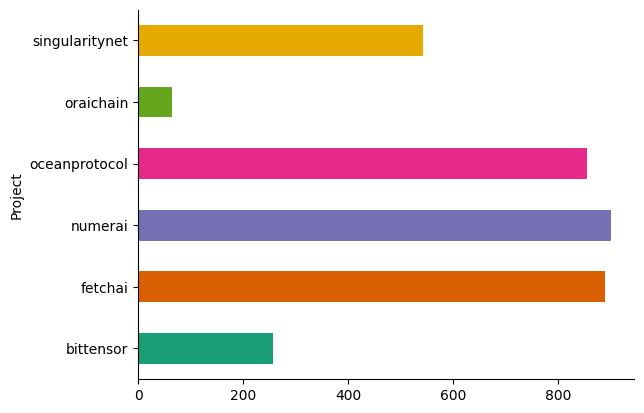

In [98]:
# Initialize an empty list to hold the data from each CSV file
all_data = []

# Iterate through all files in the directory
for filename in os.listdir(input_dir):
    if filename.endswith('_tweets.csv'):
        # Read the CSV file
        df = pd.read_csv(os.path.join(input_dir, filename))
        project_name = filename.split('_tweets.csv')[0]

        # Add the project column
        df['Project'] = project_name

        # Append the dataframe to the list
        all_data.append(df)

# Concatenate all the dataframes
merged_tweets = pd.concat(all_data, ignore_index=True)

# Save the DataFrame to a CSV file
csv_output_file_path = os.path.join(output_dir, 'tweets.csv')
merged_tweets.to_csv(csv_output_file_path, index=False)

merged_tweets.groupby('Project').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Display the first few rows of the DataFrame as a check
merged_tweets.head()


# Process commits

In [99]:
# Define the list of fields to extract from the commit information
commit_fields = [
    "commit.author.name", "commit.author.email", "commit.author.date",
    "author.id", "author.login", "author.avatar_url",
    "commit.committer.name", "commit.committer.email", "commit.committer.date",
    "commit.comment_count"
]

# List to hold data from each JSON file
all_data = []

# Function to clean up JSON string
def sanitize_json_string(json_str):
    # Remove non-ASCII characters
    cleaned_str = re.sub(r'[^\x00-\x7F]+', '', json_str)

    # Remove the message field within the commit object
    cleaned_str = re.sub(r'"message":\s*"(?:[^"\\]|\\.)*"\s*,?', '', cleaned_str, flags=re.DOTALL)

    # Remove the signature field within the verification object
    cleaned_str = re.sub(r'"signature":\s*"[^"]*",', '', cleaned_str)

    # Remove the payload field within the verification object
    cleaned_str = re.sub(r',\s*"payload":\s*"(?:[^"\\]|\\.)*"\s*', '', cleaned_str, flags=re.DOTALL)

    # Remove backslashes from the name field
    cleaned_str = re.sub(r'"name":\s*"([^"]*\\[^"]*)"', lambda m: '"name": "{}"'.format(m.group(1).replace("\\", "")), cleaned_str)

    # Remove stray commas before closing braces/brackets
    cleaned_str = re.sub(r',\s*([\]}])', r'\1', cleaned_str)

    # Remove invalid escape sequences
    cleaned_str = re.sub(r'\\(?![btnfr"\\/])', '', cleaned_str)


    return cleaned_str

def extract_repo_name(commit):
    url = commit["url"]
    parts = url.split('/')
    if len(parts) >= 5:
        return f"{parts[5]}"
    return None

# Iterate over all files in the directory
for json_file in os.listdir(input_dir):
    if "_commits" in json_file and json_file.endswith('.json'):
        with open(os.path.join(input_dir, json_file), 'r', encoding='utf-8') as f:
            json_str = f.read()
            cleaned_json_str = sanitize_json_string(json_str)
            print(f"Processing {json_file}")
            try:
                data = json.loads(cleaned_json_str)
            except json.JSONDecodeError as e:
                print(f"Error parsing JSON file {json_file}: {e}")

                # Write the cleaned JSON string to a file for inspection
                error_file_path = os.path.join(output_dir, f"error_{json_file}")
                with open(error_file_path, 'w', encoding='utf-8') as error_file:
                    error_file.write(cleaned_json_str)
                continue

        project_name = json_file.split('_commits')[0]

        # Extract the relevant data and add the project name
        if data is not None and isinstance(data, list):
            for commit_list in data:
                if isinstance(commit_list, list):
                  for commit in commit_list:
                      try:
                          repo_name = extract_repo_name(commit)

                          commit_info = {
                              "project": project_name,
                              "url": commit["url"],
                              "repository": repo_name,
                              "author_name": commit["commit"]["author"]["name"]
                          }

                          if commit.get("author"):
                              commit_info.update({
                                  "author_id": commit["author"]["id"],
                                  "author_login": commit["author"]["login"],
                                  "author_avatar_url": commit["author"]["avatar_url"]
                              })

                          commit_info.update({
                              "author_email": commit["commit"]["author"]["email"],
                              "author_date": commit["commit"]["author"]["date"],
                              "committer_name": commit["commit"]["committer"]["name"],
                              "committer_email": commit["commit"]["committer"]["email"],
                              "committer_date": commit["commit"]["committer"]["date"],
                              "comment_count": commit["commit"].get("comment_count")
                          })

                          all_data.append(commit_info)
                      except KeyError as e:
                          print(f"Missing required key in commit: {e}")
                else:
                  print(f"Expected a list of commits in {project_name}")
        else:
            raise ValueError("Data is not a list or is None")


# Create a DataFrame with all the extracted data
raw_commits_df = pd.DataFrame(all_data)

# Display the first few rows of the DataFrame
raw_commits_df.head()

Processing singularitynet_commits.json
Expected a list of commits in singularitynet
Expected a list of commits in singularitynet
Processing oraichain_commits.json
Processing fetchai_commits.json
Processing bittensor_commits.json
Processing numerai_commits.json
Processing oceanprotocol_commits.json


project                                                url  \
0  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   
1  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   
2  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   
3  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   
4  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   

   repository    author_name   author_id  author_login  \
0  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   
1  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   
2  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   
3  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   
4  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   

                                   author_avatar_url  \
0  https://avatars.githubusercontent.com/u/951673...   
1  https://avatars.githubusercontent.com/u/951673...   
2  https://avatars.githubusercontent.com/u/951673...   
3  https://avatars.githubusercontent.com/u/951673...   
4  https://avatars.githubusercontent.com/u/951673...   

               author_email           author_date committer_name  \
0  serbinadrian@outlook.com  2024-05-08T09:16:57Z  Andrew Serbin   
1  serbinadrian@outlook.com  2024-05-08T08:59:03Z  Andrew Serbin   
2  serbinadrian@outlook.com  2024-05-06T16:00:41Z  Andrew Serbin   
3  serbinadrian@outlook.com  2024-05-06T15:18:48Z  Andrew Serbin   
4  serbinadrian@outlook.com  2024-05-06T15:04:22Z  Andrew Serbin   

            committer_email        committer_date  comment_count  
0  serbinadrian@outlook.com  2024-05-08T09:16:57Z              0  
1  serbinadrian@outlook.com  2024-05-08T08:59:03Z              0  
2  serbinadrian@outlook.com  2024-05-06T16:00:41Z              0  
3  serbinadrian@outlook.com  2024-05-06T15:18:48Z              0  
4  serbinadrian@outlook.com  2024-05-06T15:04:22Z              0

# Map unique authors in the commits


In [100]:
# Load the updated unique authors file
authors_file_path = 'output/authors.csv'
authors = pd.read_csv(authors_file_path)

# Merge the commits DataFrame with the unique authors DataFrame to add the normalized_author_name
commits_df = pd.merge(raw_commits_df,
                      authors[['author_email', 'author_name', 'normalized_name']],
                      on=['author_email', 'author_name'],
                      how='left')

# Rename the 'normalized_name' column to 'normalized_author_name'
commits_df.rename(columns={'normalized_name': 'normalized_author_name'}, inplace=True)

commits_df['normalized_author_name'].fillna(commits_df['author_name'], inplace=True)

# Save the updated DataFrame
commits_path = 'output/commits.csv'
commits_df.to_csv(commits_path, index=False)

# Display the updated DataFrame
commits_df.head()

project                                                url  \
0  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   
1  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   
2  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   
3  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   
4  singularitynet  https://api.github.com/repos/singnet/agi-fauce...   

   repository    author_name   author_id  author_login  \
0  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   
1  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   
2  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   
3  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   
4  agi-faucet  Andrew Serbin  95167390.0  serbinadrian   

                                   author_avatar_url  \
0  https://avatars.githubusercontent.com/u/951673...   
1  https://avatars.githubusercontent.com/u/951673...   
2  https://avatars.githubusercontent.com/u/951673...   
3  https://avatars.githubusercontent.com/u/951673...   
4  https://avatars.githubusercontent.com/u/951673...   

               author_email           author_date committer_name  \
0  serbinadrian@outlook.com  2024-05-08T09:16:57Z  Andrew Serbin   
1  serbinadrian@outlook.com  2024-05-08T08:59:03Z  Andrew Serbin   
2  serbinadrian@outlook.com  2024-05-06T16:00:41Z  Andrew Serbin   
3  serbinadrian@outlook.com  2024-05-06T15:18:48Z  Andrew Serbin   
4  serbinadrian@outlook.com  2024-05-06T15:04:22Z  Andrew Serbin   

            committer_email        committer_date  comment_count  \
0  serbinadrian@outlook.com  2024-05-08T09:16:57Z              0   
1  serbinadrian@outlook.com  2024-05-08T08:59:03Z              0   
2  serbinadrian@outlook.com  2024-05-06T16:00:41Z              0   
3  serbinadrian@outlook.com  2024-05-06T15:18:48Z              0   
4  serbinadrian@outlook.com  2024-05-06T15:04:22Z              0   

  normalized_author_name  
0          Andrew Serbin  
1          Andrew Serbin  
2          Andrew Serbin  
3          Andrew Serbin  
4          Andrew Serbin

# Process issues

In [101]:
# Define the list of fields to extract from the issue information
issue_fields = [
    "id", "url", "number", "title", "user.id", "user.login", "labels", "state",
    "assignees", "comments", "created_at", "updated_at", "closed_at", "reactions", "repository"
]

# List to hold data from each JSON file
all_issues_data = []

# Function to extract repository name from repository_url
def extract_repository_name(repository_url):
    return repository_url.split('/')[-1]

# Function to extract label names from labels list
def extract_label_names(labels):
    return [label['name'] for label in labels] if labels else []

# Function to extract total_count from reactions
def extract_reactions_total_count(reactions):
    return reactions.get('total_count', 0) if reactions else 0

def extract_assignees_info(assignees):
    return [{"login": assignee['login'], "id": assignee['id']} for assignee in assignees] if assignees else []


# Iterate over all files in the directory
for json_file in os.listdir(input_dir):
    if "_issues" in json_file and json_file.endswith('.json'):
        with open(os.path.join(input_dir, json_file), 'r', encoding='utf-8') as f:
            print(f"Processing {json_file}")
            try:
                data = json.load(f)
            except json.JSONDecodeError as e:
                print(f"Error parsing JSON file {json_file}: {e}")

                # Write the JSON string to a file for inspection
                error_file_path = os.path.join(output_dir, f"error_{json_file}")
                with open(error_file_path, 'w', encoding='utf-8') as error_file:
                    error_file.write(json_str)
                continue

        # Extract the project name from the file name (before "_issues")
        project_name = json_file.split('_issues')[0]

        # Extract the relevant data and add the project name
        if data is not None and isinstance(data, list):
            for issue_list in data:
                if isinstance(issue_list, list):
                    for issue in issue_list:
                        try:
                            issue_info = {
                                "project": project_name,
                                "id": issue.get("id"),
                                "url": issue.get("url"),
                                "number": issue.get("number"),
                                "title": issue.get("title"),
                                "author_id": issue["user"]["id"] if issue.get("user") else None,
                                "author_login": issue["user"]["login"] if issue.get("user") else None,
                                "labels": extract_label_names(issue.get("labels")),
                                "state": issue.get("state"),
                                "assignees": extract_assignees_info(issue.get("assignees")),
                                "comments": issue.get("comments"),
                                "created_at": issue.get("created_at"),
                                "updated_at": issue.get("updated_at"),
                                "closed_at": issue.get("closed_at"),
                                "reactions": extract_reactions_total_count(issue.get("reactions")),
                                "repository": extract_repository_name(issue.get("repository_url"))
                            }

                            all_issues_data.append(issue_info)
                        except KeyError as e:
                            print(f"Missing required key in issue: {e}")
                else:
                    print(f"Expected a list of issues in {project_name}")
        else:
            raise ValueError("Data is not a list or is None")

# Create a DataFrame with all the extracted data
raw_issues_df = pd.DataFrame(all_issues_data)

# Display the first few rows of the DataFrame as a check
raw_issues_df.head()

Processing oraichain_issues.json
Processing singularitynet_issues.json
Processing fetchai_issues.json
Processing numerai_issues.json
Processing bittensor_issues.json
Processing oceanprotocol_issues.json


project          id                                                url  \
0  oraichain  1706084350  https://api.github.com/repos/oraichain/aioracl...   
1  oraichain  1700706431  https://api.github.com/repos/oraichain/aioracl...   
2  oraichain  1666259687  https://api.github.com/repos/oraichain/aioracl...   
3  oraichain  1665797663  https://api.github.com/repos/oraichain/aioracl...   
4  oraichain  1575947431  https://api.github.com/repos/oraichain/aioracl...   

   number                                              title  author_id  \
0      26                               Cw simulate aioracle    5299269   
1      25                               Cw simulate aioracle   44611780   
2      24            fix add service permissionless contract  107976941   
3      23  removed js & js server because they no longer ...   44611780   
4      22                  js: add sentry handle error - OLD  107976941   

   author_login labels   state assignees  comments            created_at  \
0    tubackkhoa     []  closed        []         0  2023-05-11T15:43:19Z   
1    ducphamle2     []  closed        []         0  2023-05-08T18:19:00Z   
2  giangnt-orai     []  closed        []         0  2023-04-13T11:46:14Z   
3    ducphamle2     []  closed        []         0  2023-04-13T06:26:09Z   
4  giangnt-orai     []  closed        []         0  2023-02-08T11:26:38Z   

             updated_at             closed_at  reactions repository  
0  2024-03-18T08:10:06Z  2024-03-18T08:10:06Z          0   aioracle  
1  2023-05-08T18:19:05Z  2023-05-08T18:19:05Z          0   aioracle  
2  2024-03-18T08:10:39Z  2024-03-18T08:10:38Z          0   aioracle  
3  2023-04-13T06:27:01Z  2023-04-13T06:27:01Z          0   aioracle  
4  2023-03-02T02:52:24Z  2023-03-02T02:52:24Z          0   aioracle

# Map unique authors in the issues

In [102]:
# Load the updated unique authors file
authors_file_path = 'output/authors.csv'
authors = pd.read_csv(authors_file_path)

# Merge the commits DataFrame with the unique authors DataFrame to add the normalized_author_name
issues_df = pd.merge(raw_issues_df,
                      authors[['author_email', 'author_name', 'author_login', 'normalized_name']],
                      on=['author_login'],
                      how='left')

# Rename the 'normalized_name' column to 'normalized_author_name'
issues_df.rename(columns={'normalized_name': 'normalized_author_name'}, inplace=True)

issues_df['normalized_author_name'].fillna(issues_df['author_login'], inplace=True)

# Save the updated DataFrame
issues_path = 'output/issues.csv'
issues_df.to_csv(issues_path, index=False)

# Display the updated DataFrame
issues_df.head()

project          id                                                url  \
0  oraichain  1706084350  https://api.github.com/repos/oraichain/aioracl...   
1  oraichain  1706084350  https://api.github.com/repos/oraichain/aioracl...   
2  oraichain  1706084350  https://api.github.com/repos/oraichain/aioracl...   
3  oraichain  1706084350  https://api.github.com/repos/oraichain/aioracl...   
4  oraichain  1706084350  https://api.github.com/repos/oraichain/aioracl...   

   number                 title  author_id author_login labels   state  \
0      26  Cw simulate aioracle    5299269   tubackkhoa     []  closed   
1      26  Cw simulate aioracle    5299269   tubackkhoa     []  closed   
2      26  Cw simulate aioracle    5299269   tubackkhoa     []  closed   
3      26  Cw simulate aioracle    5299269   tubackkhoa     []  closed   
4      26  Cw simulate aioracle    5299269   tubackkhoa     []  closed   

  assignees  comments            created_at            updated_at  \
0        []         0  2023-05-11T15:43:19Z  2024-03-18T08:10:06Z   
1        []         0  2023-05-11T15:43:19Z  2024-03-18T08:10:06Z   
2        []         0  2023-05-11T15:43:19Z  2024-03-18T08:10:06Z   
3        []         0  2023-05-11T15:43:19Z  2024-03-18T08:10:06Z   
4        []         0  2023-05-11T15:43:19Z  2024-03-18T08:10:06Z   

              closed_at  reactions repository          author_email  \
0  2024-03-18T08:10:06Z          0   aioracle  tubackkhoa@gmail.com   
1  2024-03-18T08:10:06Z          0   aioracle  tubackkhoa@gmail.com   
2  2024-03-18T08:10:06Z          0   aioracle  tubackkhoa@gmail.com   
3  2024-03-18T08:10:06Z          0   aioracle  tubackkhoa@gmail.com   
4  2024-03-18T08:10:06Z          0   aioracle  tubackkhoa@gmail.com   

     author_name normalized_author_name  
0  Pham Thanh Tu          Pham Thanh Tu  
1        Pham Tu          Pham Thanh Tu  
2         tuorai          Pham Thanh Tu  
3     tubackkhoa          Pham Thanh Tu  
4        ThanhTu          Pham Thanh Tu

# Overall developer activity

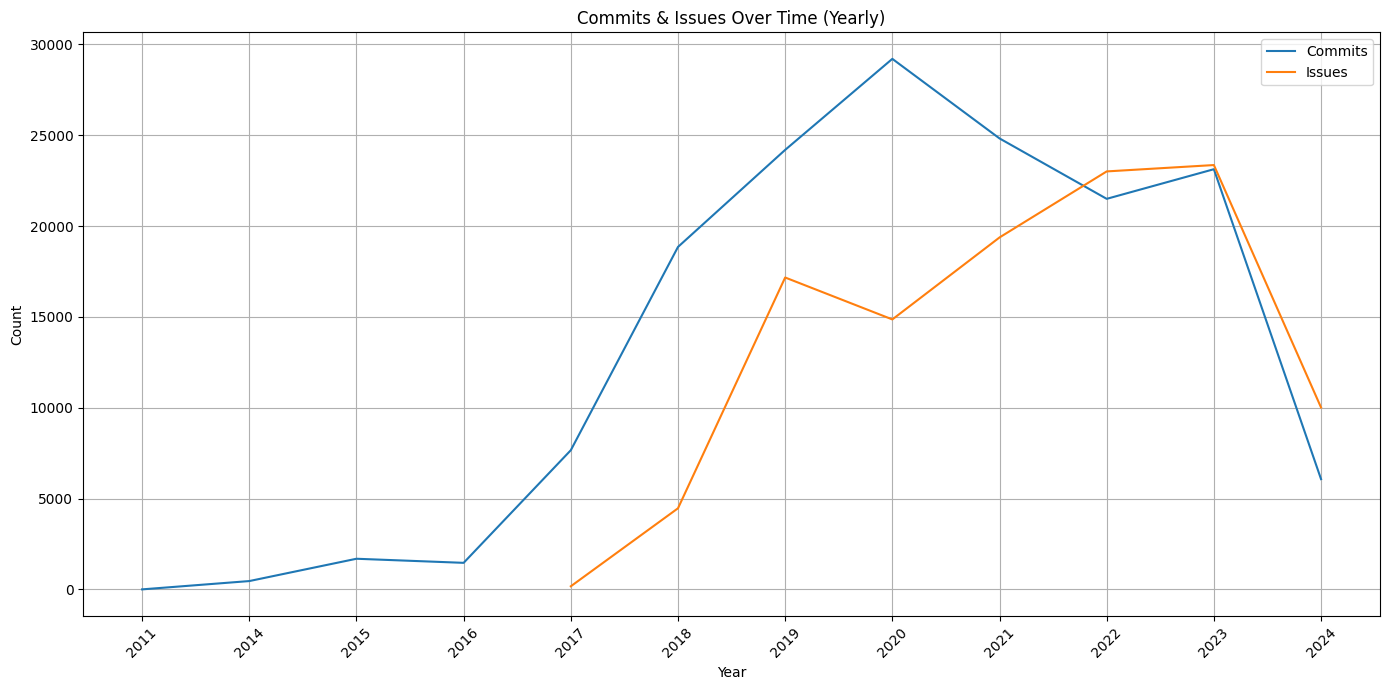

In [103]:
# Convert date columns to datetime
commits_df['author_date'] = pd.to_datetime(commits_df['author_date'])
issues_df['created_at'] = pd.to_datetime(issues_df['created_at'])
repos_df['created_at'] = pd.to_datetime(repos_df['created_at'])

# Extract year for aggregation
commits_df['year'] = commits_df['author_date'].dt.to_period('Y')
issues_df['year'] = issues_df['created_at'].dt.to_period('Y')
repos_df['year'] = repos_df['created_at'].dt.to_period('Y')

# Aggregate data to get counts per year
commits_by_year = commits_df.groupby('year').size().reset_index(name='commit_count')
issues_by_year = issues_df.groupby('year').size().reset_index(name='issue_count')
repos_by_year = repos_df.groupby('year').size().reset_index(name='repo_count')

# Plot overall trends grouped by year
plt.figure(figsize=(14, 7))

plt.plot(commits_by_year['year'].astype(str), commits_by_year['commit_count'], label='Commits')
plt.plot(issues_by_year['year'].astype(str), issues_by_year['issue_count'], label='Issues')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Commits & Issues Over Time (Yearly)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Repos evolution

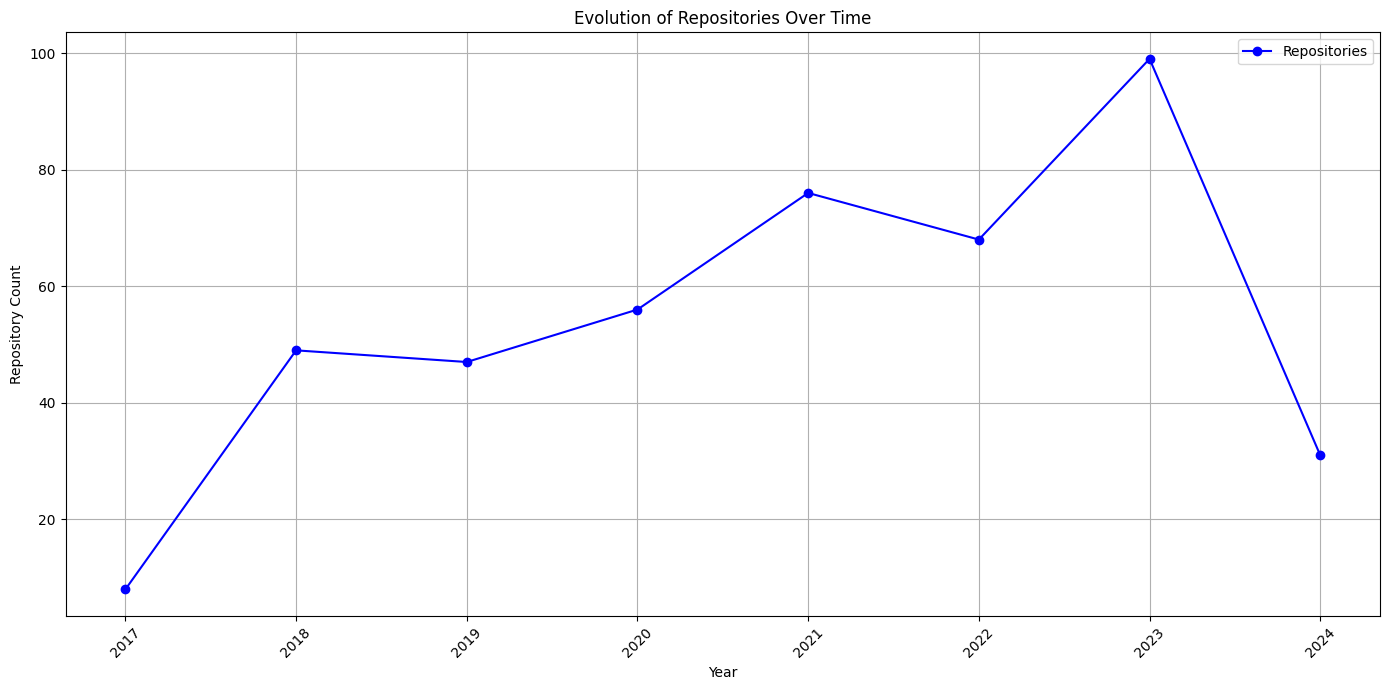

In [104]:
# Plot the evolution of repositories over time
plt.figure(figsize=(14, 7))

plt.plot(repos_by_year['year'].astype(str), repos_by_year['repo_count'], label='Repositories', color='blue', marker='o')

plt.xlabel('Year')
plt.ylabel('Repository Count')
plt.title('Evolution of Repositories Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Repos evolution over the years


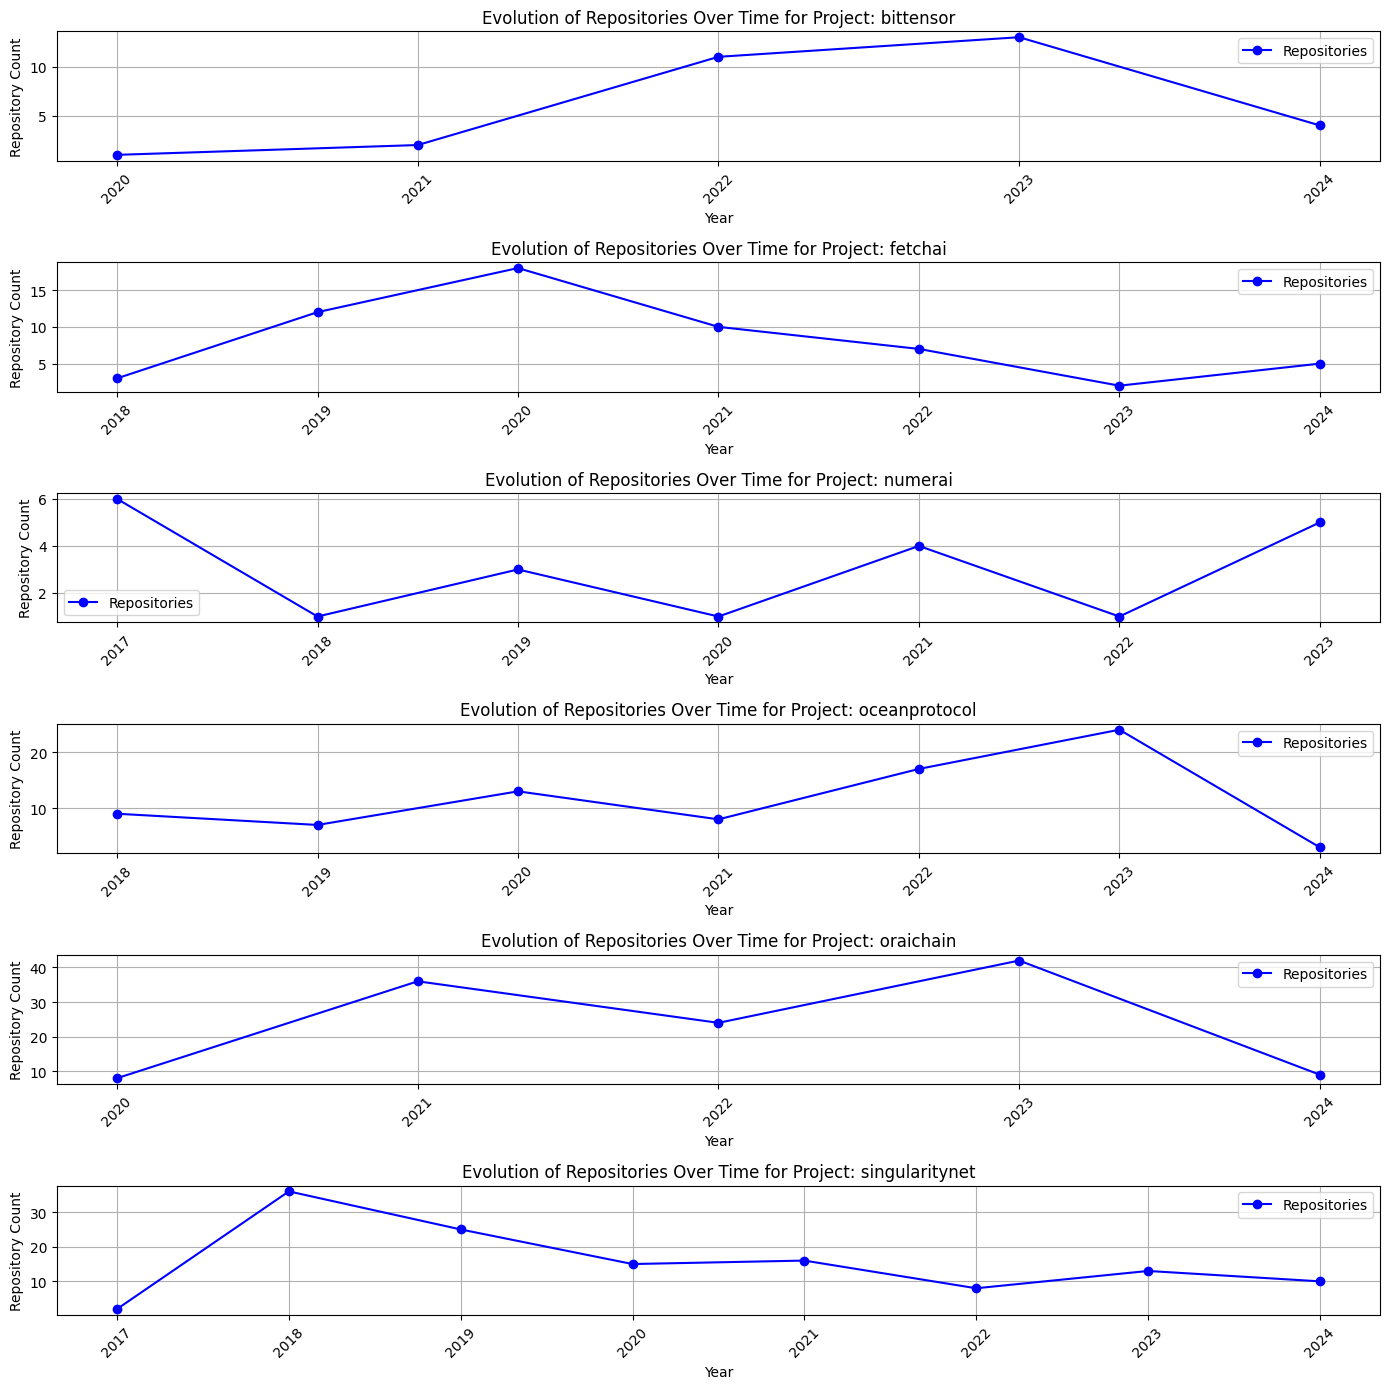

In [105]:
# Aggregate data by project and year for repositories
repos_by_project_year = repos_df.groupby(['project', 'year']).size().reset_index(name='repo_count')

# Plot trends for each project
repo_projects = repos_by_project_year['project'].unique()

plt.figure(figsize=(14, 14))
for i, project in enumerate(repo_projects, 1):
    plt.subplot(len(repo_projects), 1, i)
    project_repos = repos_by_project_year[repos_by_project_year['project'] == project]

    plt.plot(project_repos['year'].astype(str), project_repos['repo_count'], label='Repositories', color='blue', marker='o')

    plt.xlabel('Year')
    plt.ylabel('Repository Count')
    plt.title(f'Evolution of Repositories Over Time for Project: {project}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

plt.show()

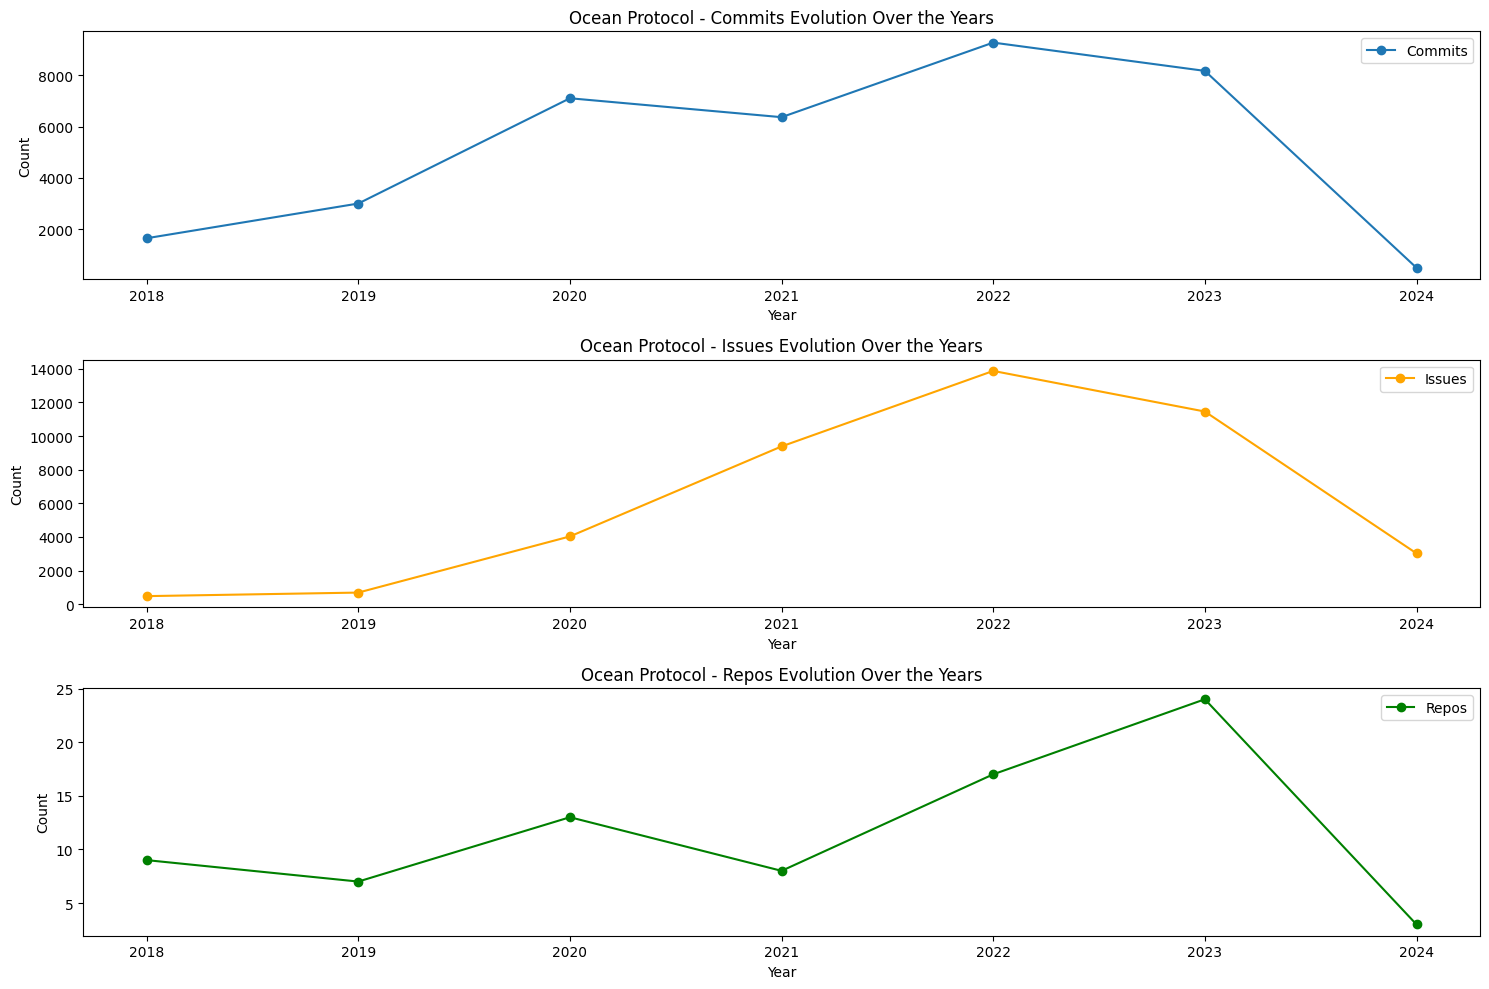

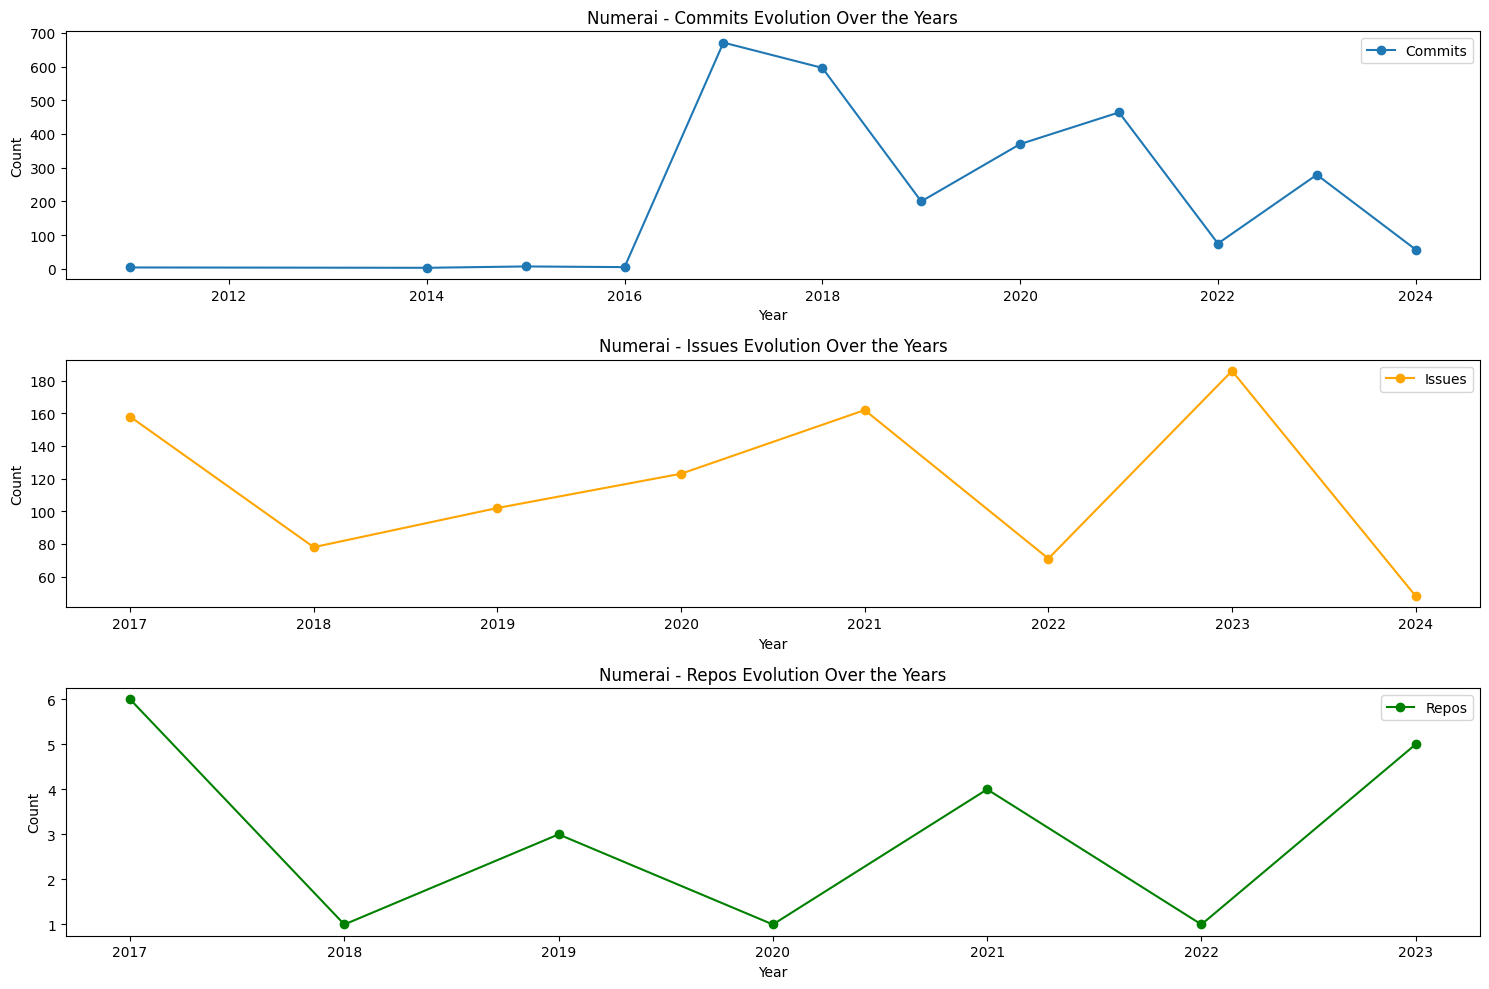

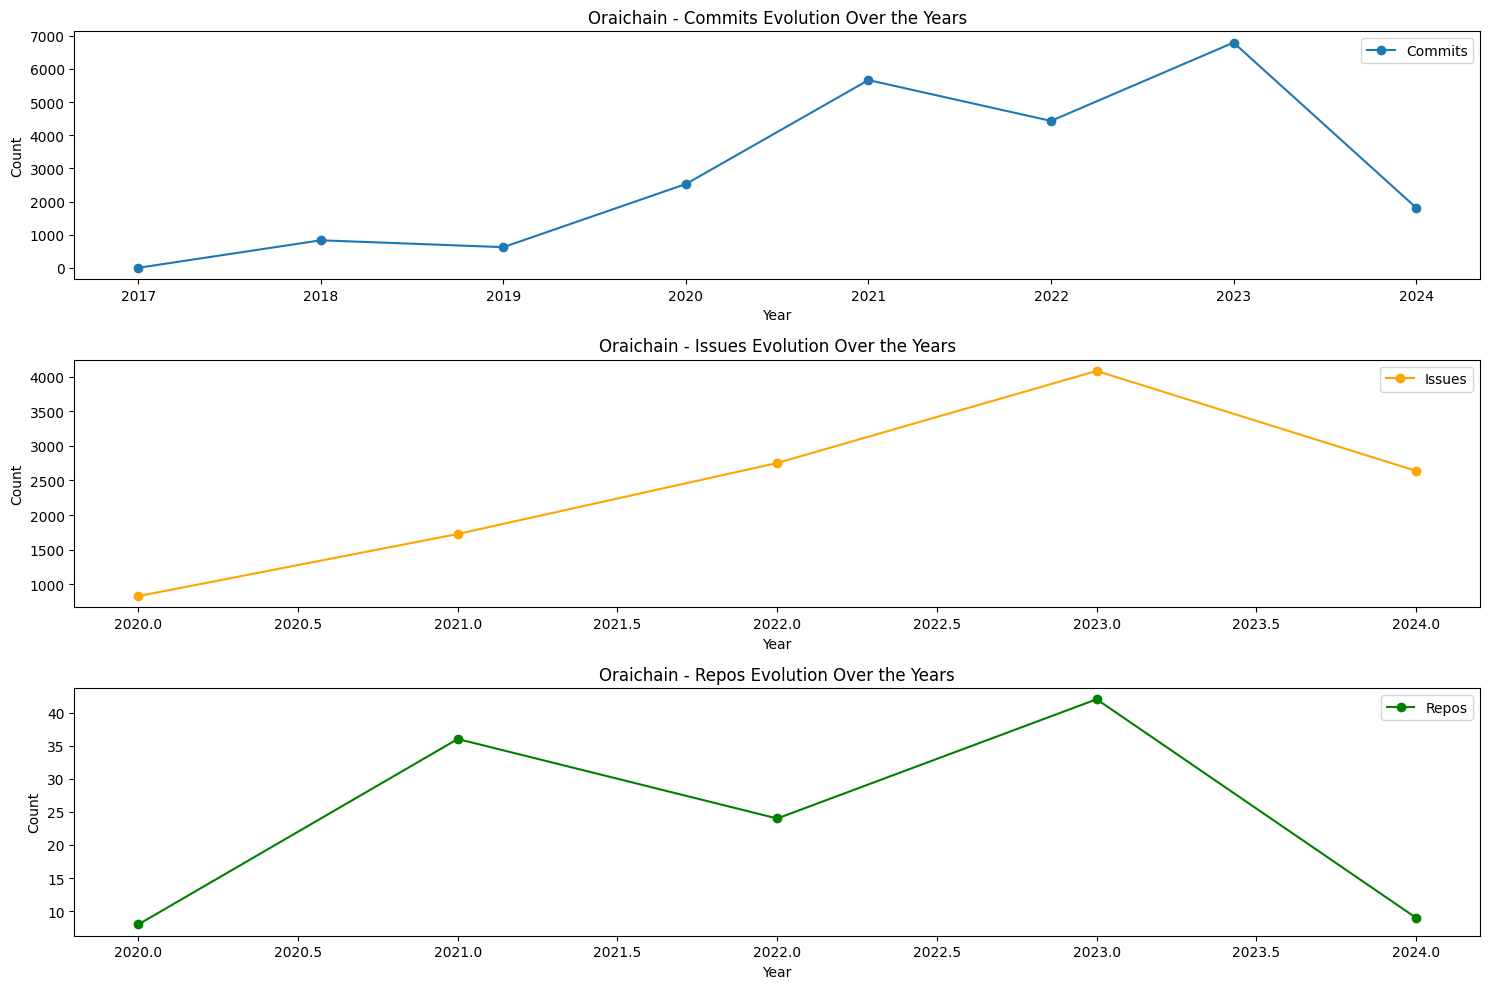

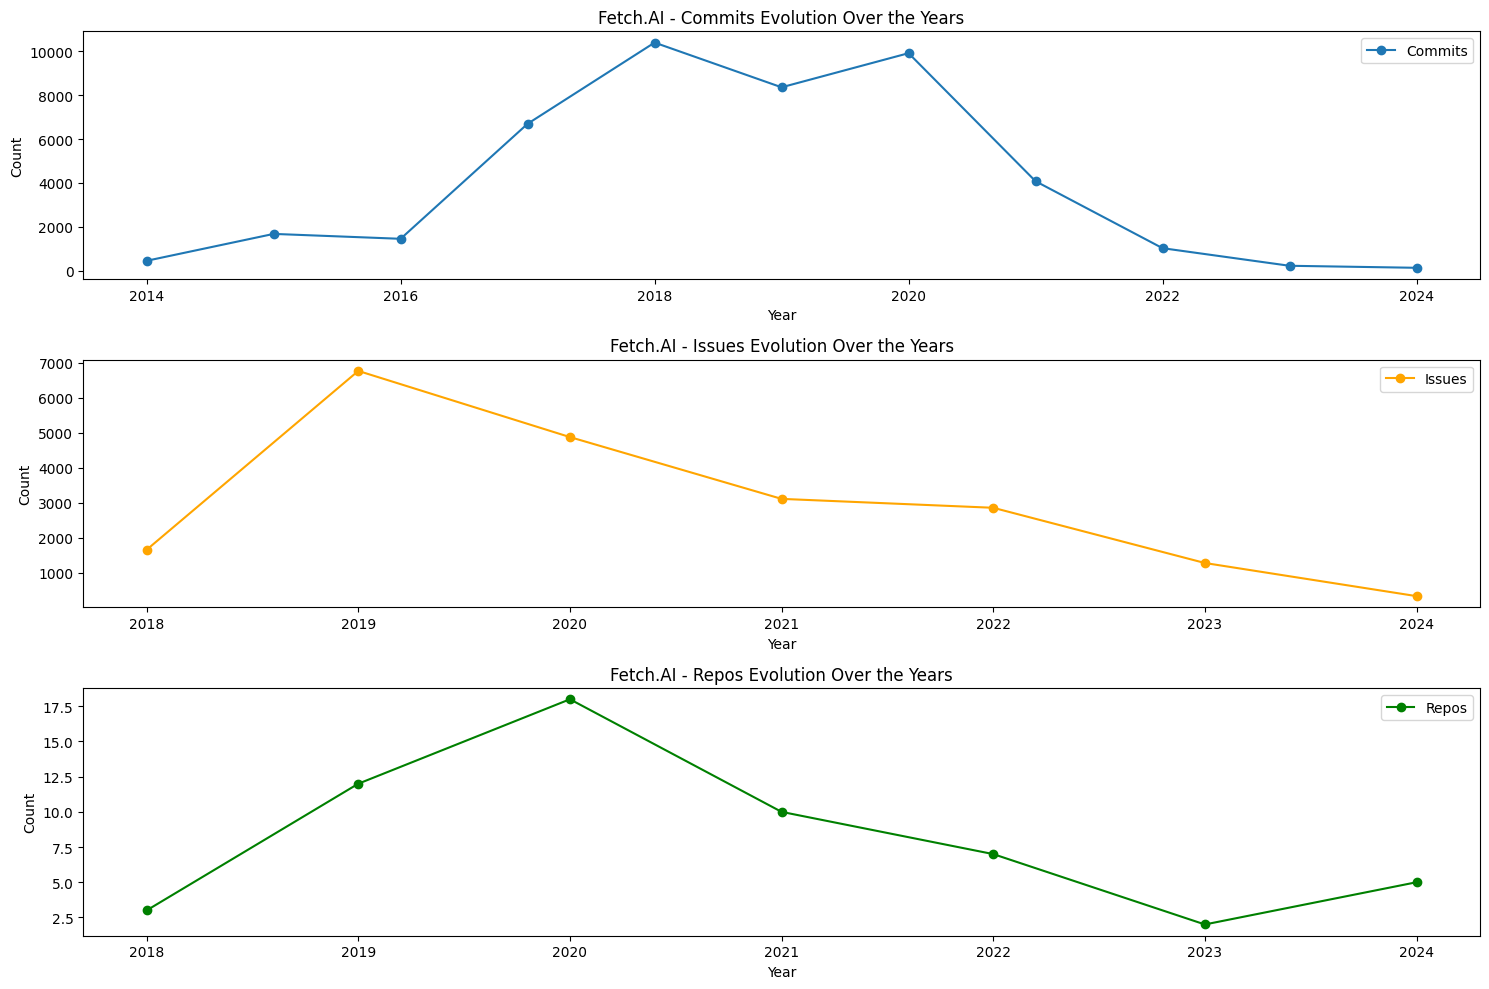

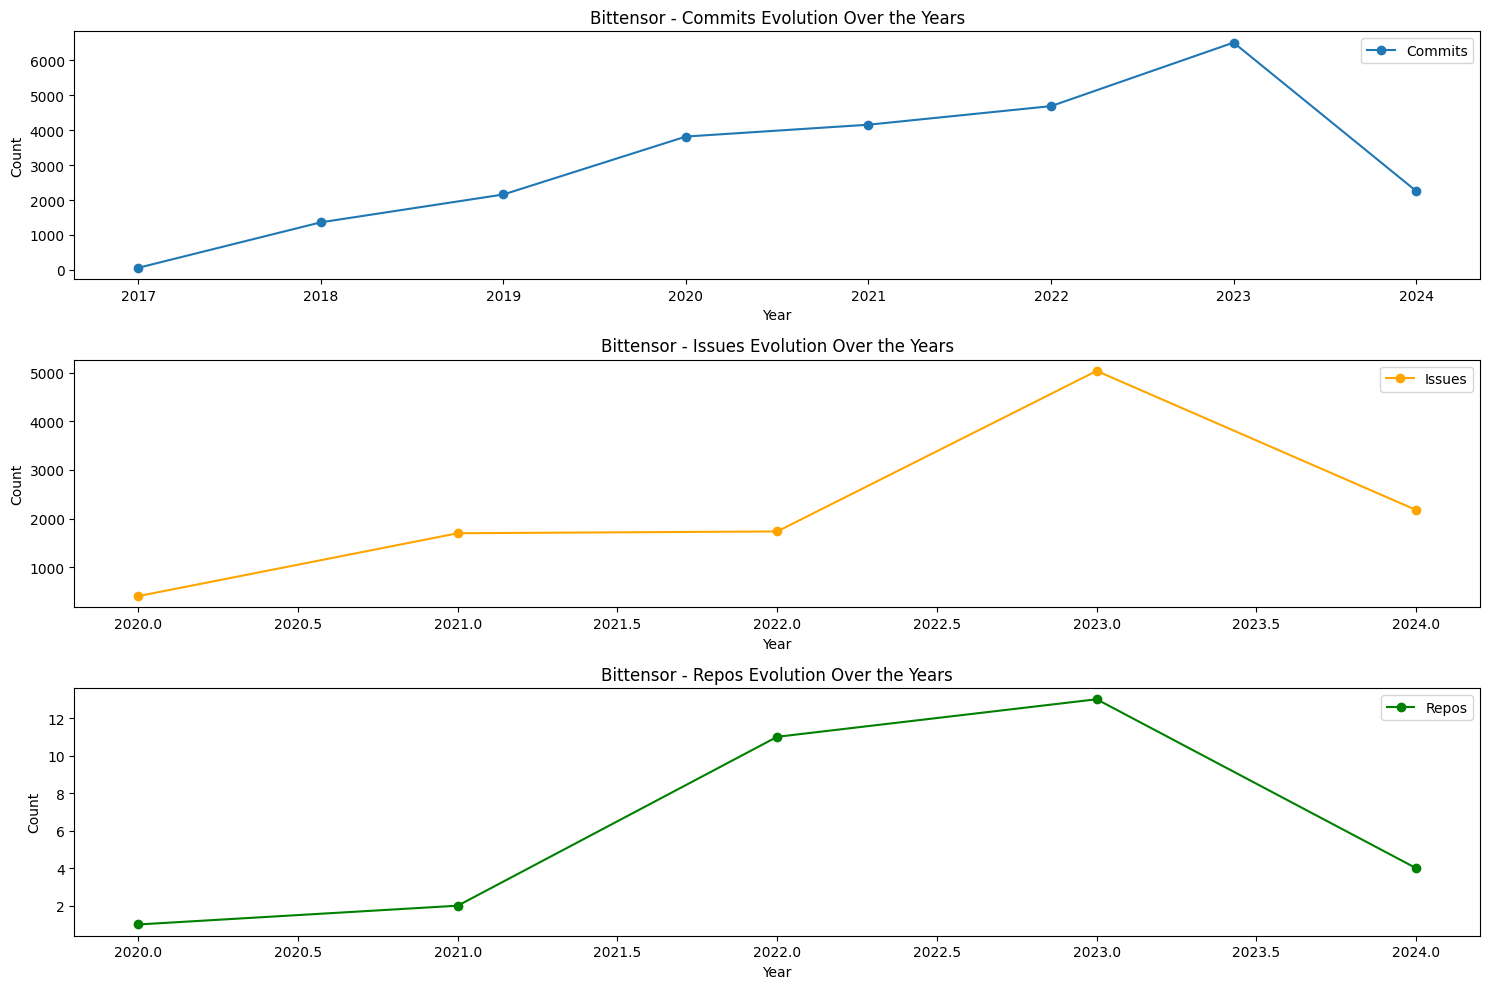

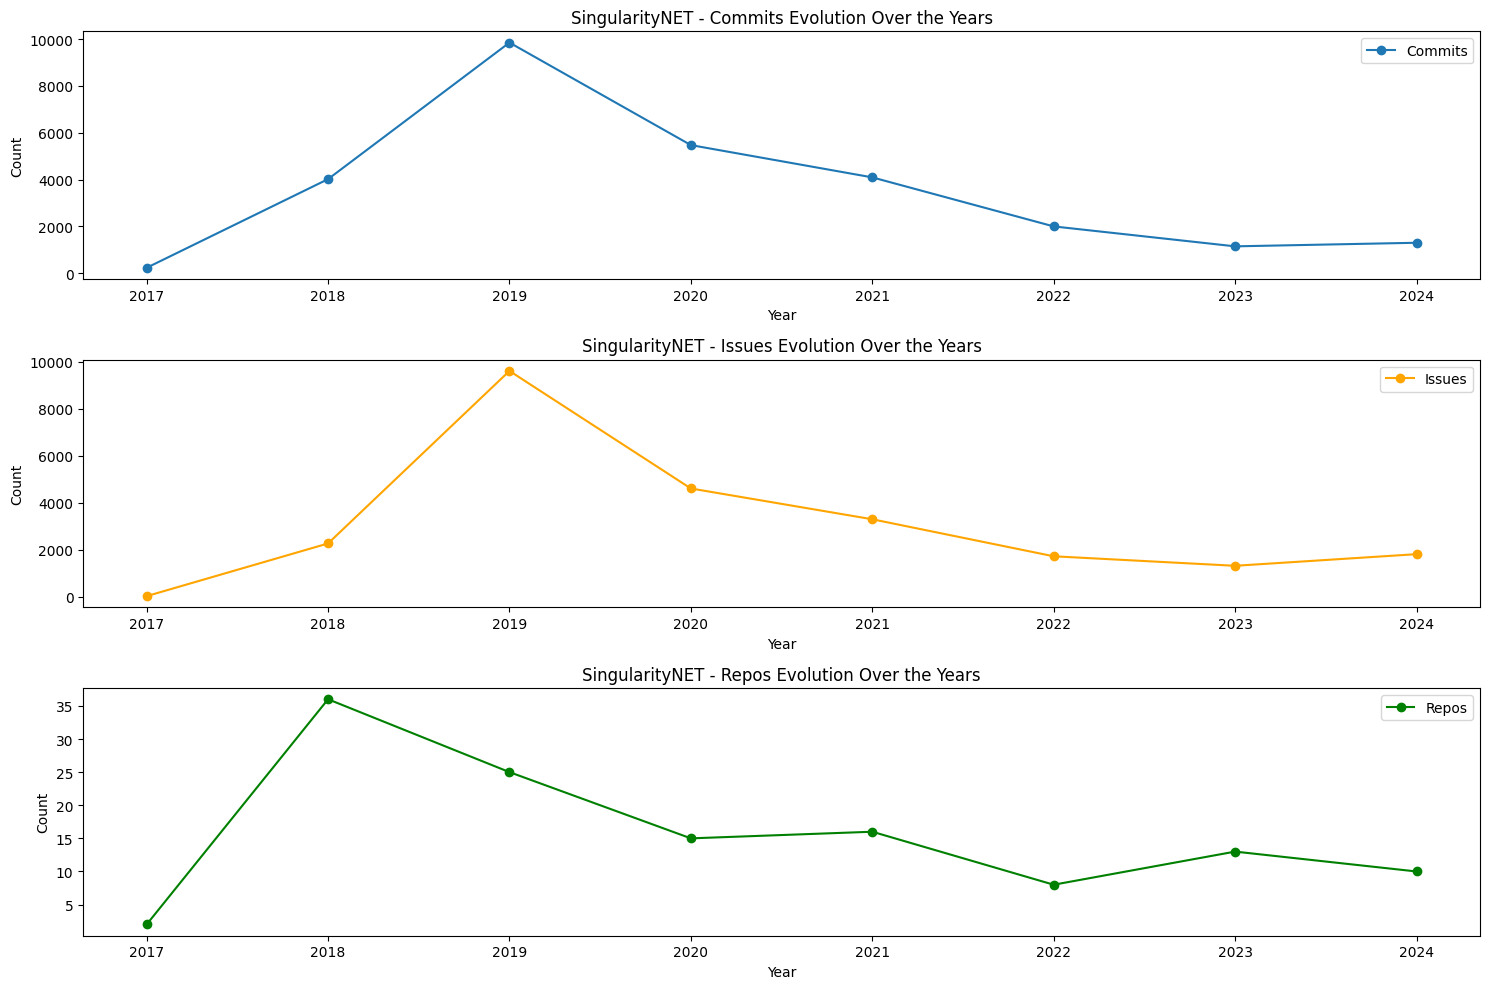

{'Ocean Protocol': {'commits': year
  2018    1648
  2019    3000
  2020    7100
  2021    6363
  2022    9268
  2023    8166
  2024     497
  dtype: int64,
  'issues': year
  2018      475
  2019      686
  2020     4029
  2021     9386
  2022    13879
  2023    11462
  2024     3019
  dtype: int64,
  'repos': year
  2018     9
  2019     7
  2020    13
  2021     8
  2022    17
  2023    24
  2024     3
  dtype: int64},
 'Numerai': {'commits': year
  2011      4
  2014      3
  2015      7
  2016      5
  2017    671
  2018    596
  2019    200
  2020    370
  2021    464
  2022     75
  2023    279
  2024     57
  dtype: int64,
  'issues': year
  2017    158
  2018     78
  2019    102
  2020    123
  2021    162
  2022     71
  2023    186
  2024     48
  dtype: int64,
  'repos': year
  2017    6
  2018    1
  2019    3
  2020    1
  2021    4
  2022    1
  2023    5
  dtype: int64},
 'Oraichain': {'commits': year
  2017       2
  2018     831
  2019     624
  2020    2528
  2021  

In [106]:
# Load the dataset
commits_df = pd.read_csv('output/commits.csv')
repos_df = pd.read_csv('output/repos.csv')
issues_df = pd.read_csv('output/issues.csv')

# Parse the dates for easier handling
commits_df['author_date'] = pd.to_datetime(commits_df['author_date'])
commits_df['year'] = commits_df['author_date'].dt.year

issues_df['created_at'] = pd.to_datetime(issues_df['created_at'])
issues_df['year'] = issues_df['created_at'].dt.year

repos_df['created_at'] = pd.to_datetime(repos_df['created_at'])
repos_df['year'] = repos_df['created_at'].dt.year


# Function to plot data for each project
def plot_project_data(project_key, project_name):
    # Filter data for the specific project
    project_commits = commits_df[commits_df['project'].str.lower() == project_key.lower()]
    project_issues = issues_df[issues_df['project'].str.lower() == project_key.lower()]
    project_repos = repos_df[repos_df['project'].str.lower() == project_key.lower()]

    # Group by year and count
    commits_per_year = project_commits.groupby('year').size()
    issues_per_year = project_issues.groupby('year').size()
    repos_per_year = project_repos.groupby('year').size()

    # Plot the results
    plt.figure(figsize=(15, 10))

    # Commits evolution over the years
    plt.subplot(3, 1, 1)
    plt.plot(commits_per_year.index, commits_per_year.values, marker='o', label='Commits')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'{project_name} - Commits Evolution Over the Years')
    plt.legend()

    # Issues evolution over the years
    plt.subplot(3, 1, 2)
    plt.plot(issues_per_year.index, issues_per_year.values, marker='o', label='Issues', color='orange')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'{project_name} - Issues Evolution Over the Years')
    plt.legend()

    # Repos evolution over the years
    plt.subplot(3, 1, 3)
    plt.plot(repos_per_year.index, repos_per_year.values, marker='o', label='Repos', color='green')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'{project_name} - Repos Evolution Over the Years')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return commits_per_year, issues_per_year, repos_per_year

# Analyze each project
project_insights = {}

for project in projects:
    for key, name in project.items():
        commits, issues, repos = plot_project_data(key, name)
        project_insights[name] = {
            "commits": commits,
            "issues": issues,
            "repos": repos
        }

project_insights


# Commits ranking


In [107]:
# Extract year from the author_date for commits
commits_df['year'] = commits_df['author_date'].dt.year

# Calculate the number of commits per project per year
commits_per_year = commits_df.groupby(['project', 'year']).size().reset_index(name='commits_per_year')

# Calculate the total commits per project
total_commits_per_project = commits_df.groupby('project').size().reset_index(name='total_commits')

# Merge both results for a comprehensive view
commits_summary = pd.merge(commits_per_year, total_commits_per_project, on='project', how='left')

# Sort the total commits per project by commit count
total_commits_sorted = total_commits_per_project.sort_values(by='total_commits', ascending=False).reset_index(drop=True)

# Display total commits per project sorted by commit count
print("\nTotal Commits Per Project (sorted by commit count):")
print(total_commits_sorted)



Total Commits Per Project (sorted by commit count):
          project  total_commits
0         fetchai          44432
1   oceanprotocol          36042
2  singularitynet          28134
3       bittensor          25005
4       oraichain          22681
5         numerai           2731


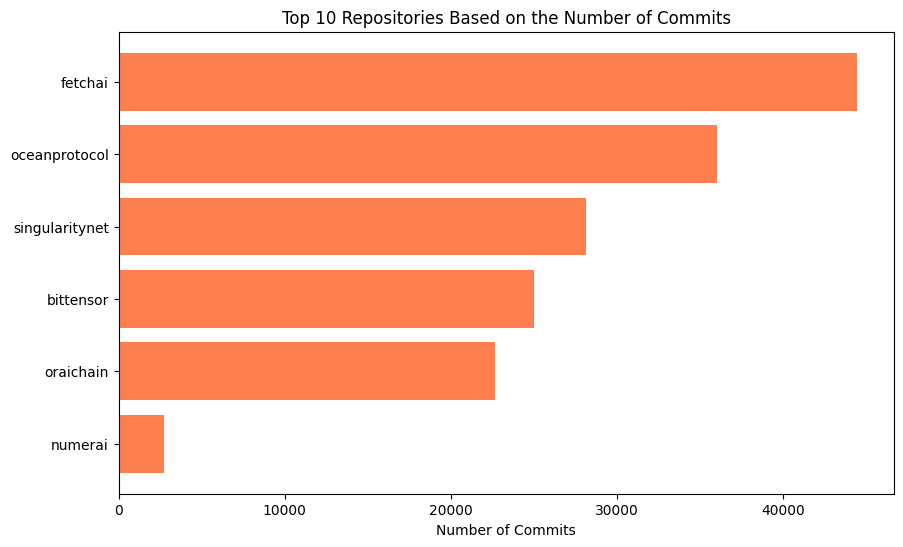

Top 10 Repositories Based on the Number of Commits:
          project  commit_count
1         fetchai         44432
3   oceanprotocol         36042
5  singularitynet         28134
0       bittensor         25005
4       oraichain         22681
2         numerai          2731


In [108]:
# Count the number of commits per repository
top_10_commits_repos = commits_df.groupby('project')['author_login'].size().reset_index(name='commit_count')
top_10_commits_repos = top_10_commits_repos.nlargest(10, 'commit_count')

# Plot the top 10 repositories based on the number of commits
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_commits_repos['project'], top_10_commits_repos['commit_count'], color='coral')
ax.set_xlabel('Number of Commits')
ax.set_title('Top 10 Repositories Based on the Number of Commits')
plt.gca().invert_yaxis()
plt.show()

# Print the results
print("Top 10 Repositories Based on the Number of Commits:")
print(top_10_commits_repos)


# Repos Ranking

          project  total_repos
5  singularitynet          125
4       oraichain          119
3   oceanprotocol           81
1         fetchai           57
0       bittensor           31
2         numerai           21


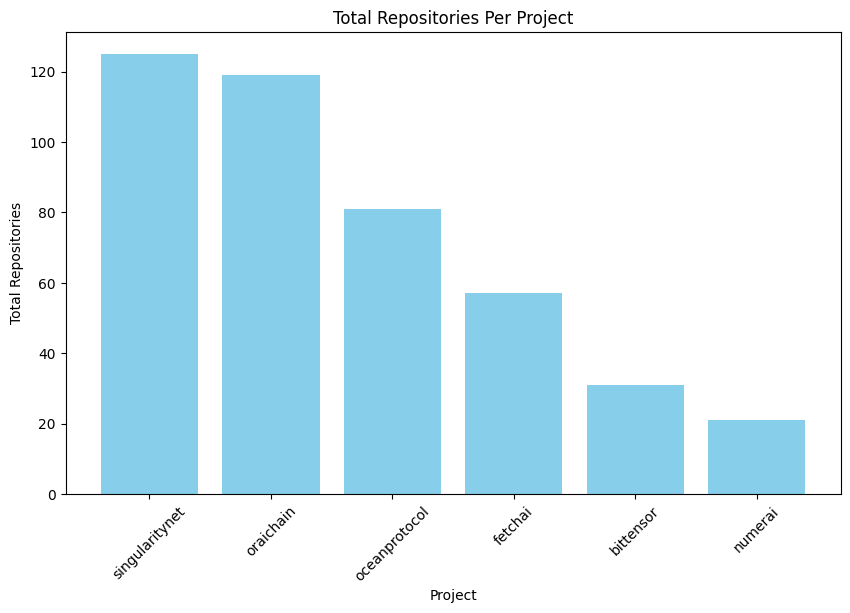

In [109]:
# Calculate the total number of repositories per project
total_repos_per_project = repos_df.groupby('project').size().reset_index(name='total_repos')

# Sort the projects by the number of repositories in descending order
total_repos_per_project = total_repos_per_project.sort_values(by='total_repos', ascending=False)

print(total_repos_per_project)

# Plot the total number of repositories per project
plt.figure(figsize=(10, 6))
plt.bar(total_repos_per_project['project'], total_repos_per_project['total_repos'], color='skyblue')
plt.xlabel('Project')
plt.ylabel('Total Repositories')
plt.title('Total Repositories Per Project')
plt.xticks(rotation=45)
plt.show()

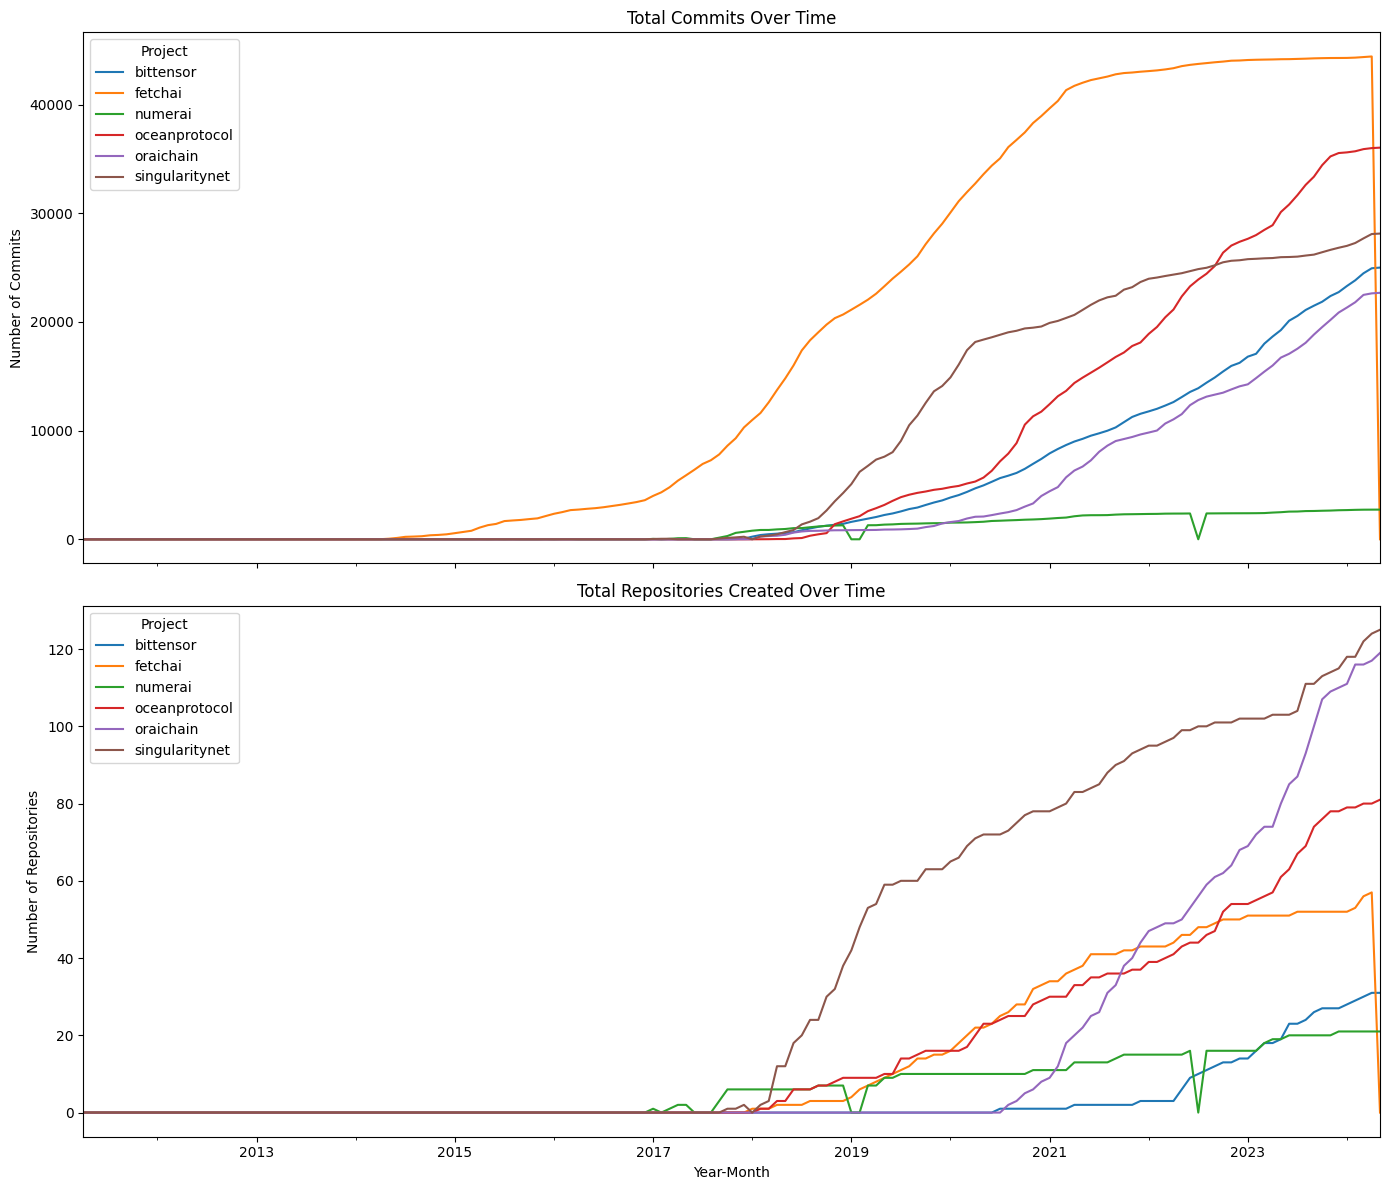

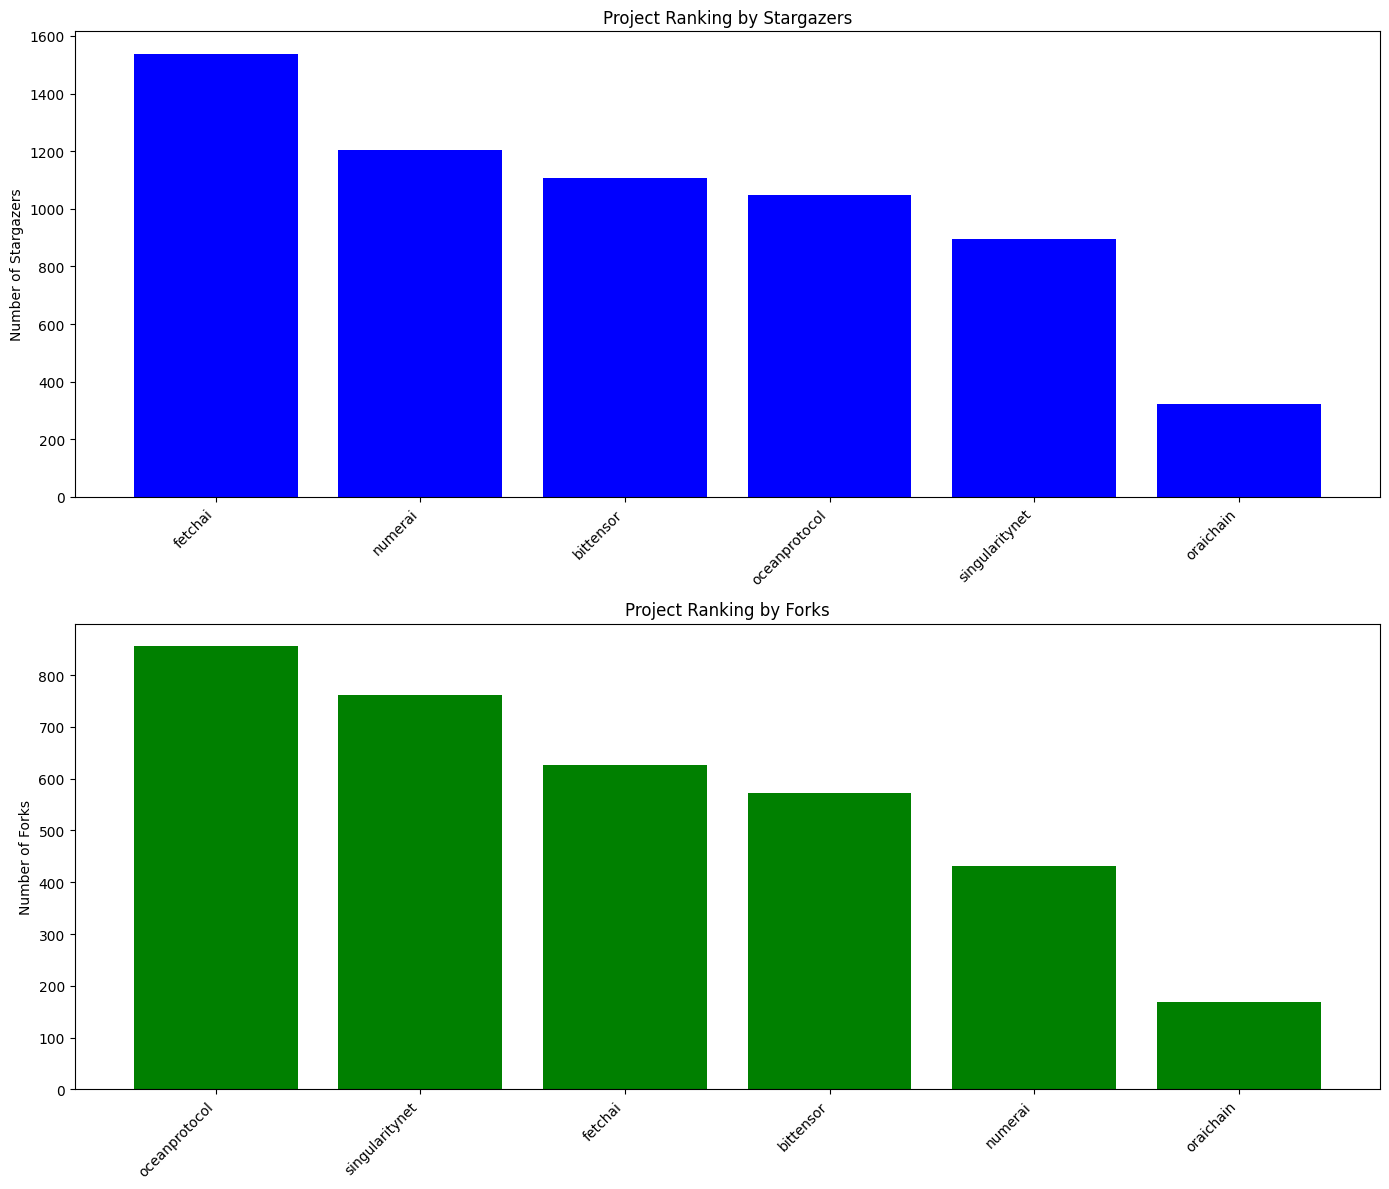

In [110]:
# Extract year and month from the author_date for commits and created_at for repos
commits_df['year_month'] = commits_df['author_date'].dt.to_period('M')
repos_df['year_month'] = repos_df['created_at'].dt.to_period('M')

# Calculate the number of commits and repositories created per project per month
commits_per_month = commits_df.groupby(['project', 'year_month']).size().reset_index(name='commit_count')
repos_per_month = repos_df.groupby(['project', 'year_month']).size().reset_index(name='repo_count')

# Merge the two datasets on project and year_month
merged_df = pd.merge(commits_per_month, repos_per_month, on=['project', 'year_month'], how='outer').fillna(0)

# Calculate the total commits and repositories created per project over time
total_metrics = merged_df.groupby(['project', 'year_month']).sum().groupby(level=0).cumsum().reset_index()

# Plot the evolution of the ranking over time
pivot_commits = total_metrics.pivot(index='year_month', columns='project', values='commit_count').fillna(0)
pivot_repos = total_metrics.pivot(index='year_month', columns='project', values='repo_count').fillna(0)

fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot the total commits over time
pivot_commits.plot(ax=ax[0])
ax[0].set_title('Total Commits Over Time')
ax[0].set_ylabel('Number of Commits')
ax[0].legend(title='Project')

# Plot the total repositories created over time
pivot_repos.plot(ax=ax[1])
ax[1].set_title('Total Repositories Created Over Time')
ax[1].set_ylabel('Number of Repositories')
ax[1].set_xlabel('Year-Month')
ax[1].legend(title='Project')

plt.tight_layout()
plt.show()

# Group by project and sum the stargazers and forks counts
stargazers_ranking = repos_df.groupby('project')['stargazers_count'].sum().reset_index()
forks_ranking = repos_df.groupby('project')['forks_count'].sum().reset_index()

# Sort the rankings
stargazers_ranking = stargazers_ranking.sort_values(by='stargazers_count', ascending=False).reset_index(drop=True)
forks_ranking = forks_ranking.sort_values(by='forks_count', ascending=False).reset_index(drop=True)

# Plot the rankings
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Plot stargazers ranking
ax[0].bar(stargazers_ranking['project'], stargazers_ranking['stargazers_count'], color='blue')
ax[0].set_title('Project Ranking by Stargazers')
ax[0].set_ylabel('Number of Stargazers')
ax[0].set_xticks(range(len(stargazers_ranking['project'])))
ax[0].set_xticklabels(stargazers_ranking['project'], rotation=45, ha='right')

# Plot forks ranking
ax[1].bar(forks_ranking['project'], forks_ranking['forks_count'], color='green')
ax[1].set_title('Project Ranking by Forks')
ax[1].set_ylabel('Number of Forks')
ax[1].set_xticks(range(len(forks_ranking['project'])))
ax[1].set_xticklabels(forks_ranking['project'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Stargazers

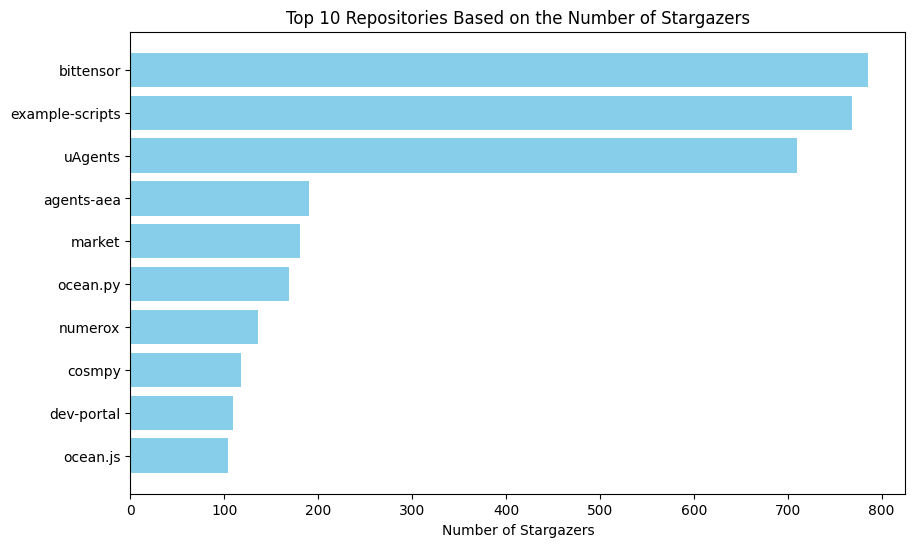

                name         project  stargazers_count
0          bittensor       bittensor               786
213  example-scripts         numerai               768
84           uAgents         fetchai               710
32        agents-aea         fetchai               190
253           market   oceanprotocol               181
263         ocean.py   oceanprotocol               169
221          numerox         numerai               136
45            cosmpy         fetchai               118
344       dev-portal  singularitynet               109
261         ocean.js   oceanprotocol               104


In [111]:
# Get the top 10 repositories based on the number of stargazers
top_10_stargazers = repos_df.nlargest(10, 'stargazers_count')[['name', 'project', 'stargazers_count']]

# Plot the top 10 repositories based on the number of stargazers
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_stargazers['name'], top_10_stargazers['stargazers_count'], color='skyblue')
ax.set_xlabel('Number of Stargazers')
ax.set_title('Top 10 Repositories Based on the Number of Stargazers')
plt.gca().invert_yaxis()
plt.show()

# Display the top 5 repositories
print(top_10_stargazers)


          project  stargazers_count
0         fetchai              1539
1         numerai              1205
2       bittensor              1106
3   oceanprotocol              1049
4  singularitynet               894
5       oraichain               323


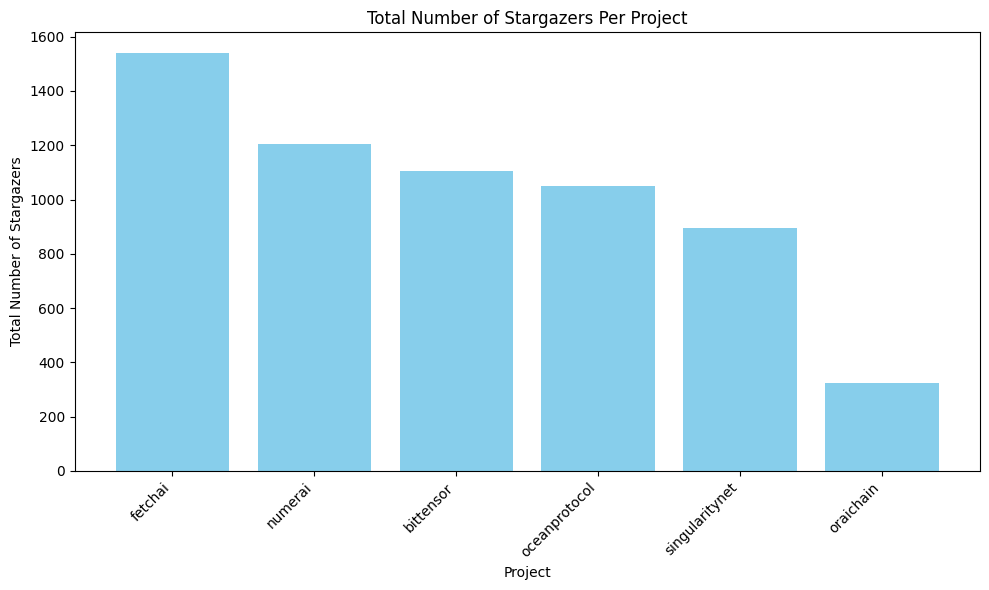

In [112]:
# Calculate the total number of stargazers per project
total_stargazers_per_project = repos_df.groupby('project')['stargazers_count'].sum().reset_index()

# Sort the projects by the total number of stargazers
stargazers_ranking = total_stargazers_per_project.sort_values(by='stargazers_count', ascending=False).reset_index(drop=True)

print(stargazers_ranking)
# Plot the total number of stargazers per project
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(stargazers_ranking['project'], stargazers_ranking['stargazers_count'], color='skyblue')
ax.set_xlabel('Project')
ax.set_ylabel('Total Number of Stargazers')
ax.set_title('Total Number of Stargazers Per Project')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Forks

          project  forks_count
0   oceanprotocol          856
1  singularitynet          762
2         fetchai          626
3       bittensor          573
4         numerai          431
5       oraichain          168


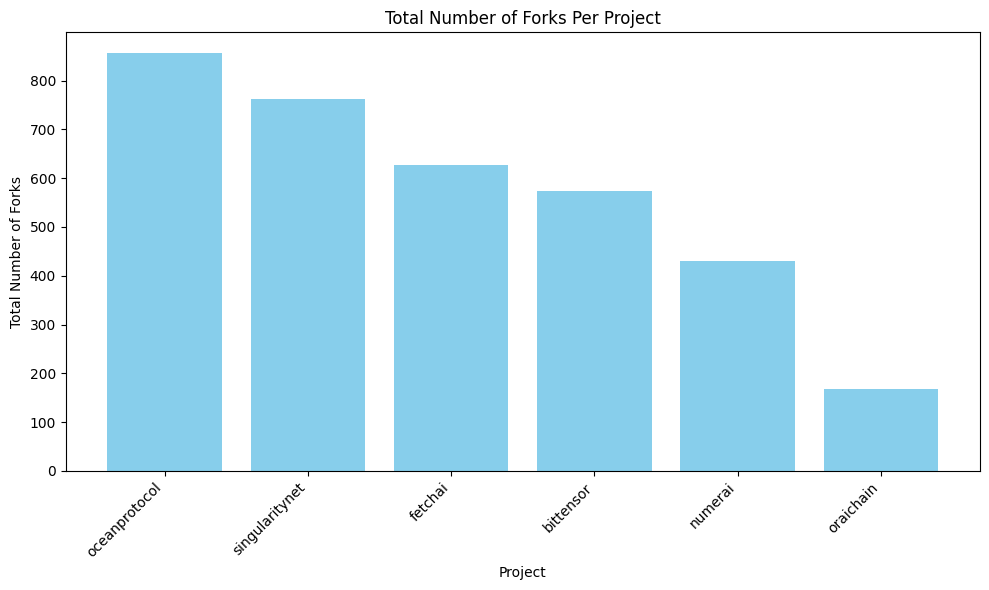

In [113]:
# Calculate the total number of forks per project
total_forks_per_project = repos_df.groupby('project')['forks_count'].sum().reset_index()

# Sort the projects by the total number of stargazers
forks_ranking = total_forks_per_project.sort_values(by='forks_count', ascending=False).reset_index(drop=True)

print(forks_ranking)

# Plot the total number of forks per project
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(forks_ranking['project'], forks_ranking['forks_count'], color='skyblue')
ax.set_xlabel('Project')
ax.set_ylabel('Total Number of Forks')
ax.set_title('Total Number of Forks Per Project')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


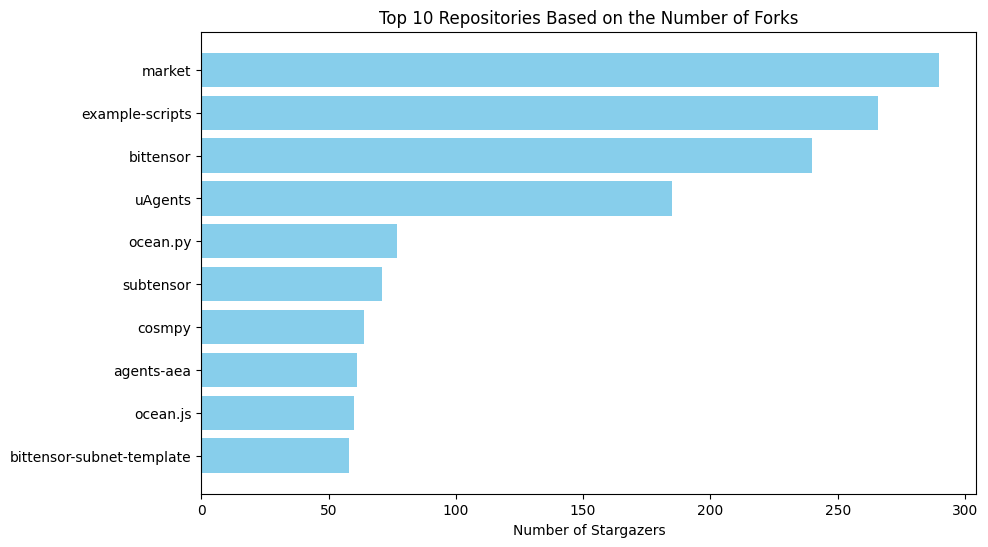

                          name        project  forks_count
253                     market  oceanprotocol          290
213            example-scripts        numerai          266
0                    bittensor      bittensor          240
84                     uAgents        fetchai          185
263                   ocean.py  oceanprotocol           77
24                   subtensor      bittensor           71
45                      cosmpy        fetchai           64
32                  agents-aea        fetchai           61
261                   ocean.js  oceanprotocol           60
5    bittensor-subnet-template      bittensor           58


In [114]:
# Get the top 10 repositories based on the number of stargazers
top_10_forks = repos_df.nlargest(10, 'forks_count')[['name', 'project', 'forks_count']]

# Plot the top 10 repositories based on the number of stargazers
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_forks['name'], top_10_forks['forks_count'], color='skyblue')
ax.set_xlabel('Number of Stargazers')
ax.set_title('Top 10 Repositories Based on the Number of Forks')
plt.gca().invert_yaxis()
plt.show()

# Display the top 5 repositories
print(top_10_forks)


# Open issues

Top 10 Authors by Number of Unique Issues Opened (Excluding Dependabot):
    normalized_author_name  issue_count
31             Alex Coseru         1806
501        Trent McConaghy         1516
135         David Minarsch         1450
394         Prashant Gupta          942
323   Matthias Kretschmann          910
102           Calina Cenan          853
81           Berkay Saglam          790
312          MarcoFavorito          762
333          Mihai Scarlat          739
204         Hau Nguyen Van          706


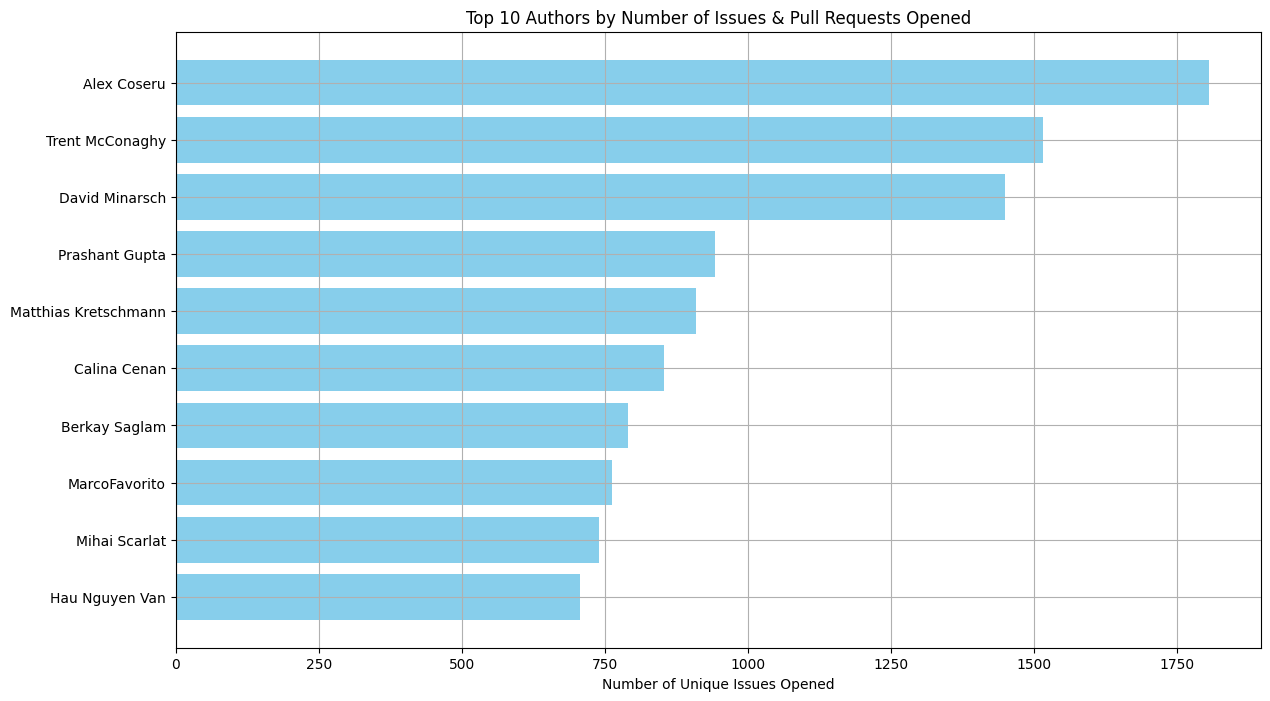

In [115]:
# Load the issues dataset
issues_file_path = 'output/issues.csv'
issues_df = pd.read_csv(issues_file_path)

# Remove duplicate issues based on the 'id' column
unique_issues_df = issues_df.drop_duplicates(subset='id')

# Group by normalized_author_name to count the number of unique issues opened by each author
unique_issues_by_author = unique_issues_df.groupby('normalized_author_name').size().reset_index(name='issue_count')

# Filter out Dependabot from the issues dataset
filtered_unique_issues_by_author = unique_issues_by_author[unique_issues_by_author['normalized_author_name'] != 'Dependabot']

# Get the top 10 authors based on the number of unique issues opened
filtered_top_10_authors_by_unique_issues = filtered_unique_issues_by_author.nlargest(10, 'issue_count')

# Display the top 10 authors who opened the most unique issues, excluding Dependabot
print("Top 10 Authors by Number of Unique Issues Opened (Excluding Dependabot):")
print(filtered_top_10_authors_by_unique_issues)

# Plot the top 10 authors based on the number of unique issues opened, excluding Dependabot
plt.figure(figsize=(14, 8))
plt.barh(filtered_top_10_authors_by_unique_issues['normalized_author_name'], filtered_top_10_authors_by_unique_issues['issue_count'], color='skyblue')
plt.xlabel('Number of Unique Issues Opened')
plt.title('Top 10 Authors by Number of Issues & Pull Requests Opened')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# Contributors


Top 10 Contributors Across All Projects:
     normalized_author_name  commit_count
418           Ethan Buchman          6372
324          David Minarsch          5357
835    Matthias Kretschmann          4981
372             Duc Pham Le          4060
974           Pham Thanh Tu          3718
55              Alex Coseru          3067
682       JungHwan Tony Yun          3020
1247        Trent McConaghy          2925
142                   Anton          2849
578                Jae Kwon          2798


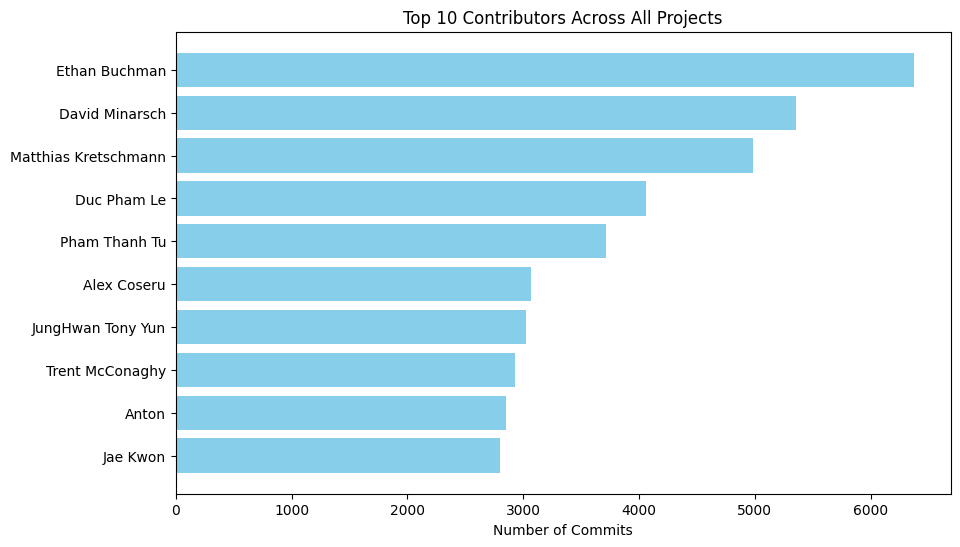

Top 10 Contributors Per Project:
           project    normalized_author_name  commit_count
0        bittensor        Bastian Ku00f6cher          1386
1        bittensor                   unconst          1278
2        bittensor                Gavin Wood          1131
3        bittensor              Ala Shaabana           871
4        bittensor              philanthrope           799
5        bittensor         Cameron Fairchild           750
6        bittensor                     Carro           656
7        bittensor          asynchronous rob           649
8        bittensor            Pierre Krieger           618
9        bittensor                p-ferreira           561
10         fetchai             Ethan Buchman          6372
11         fetchai            David Minarsch          5357
12         fetchai                     Anton          2831
13         fetchai                  Jae Kwon          2798
14         fetchai             MarcoFavorito          2736
15         fetchai     

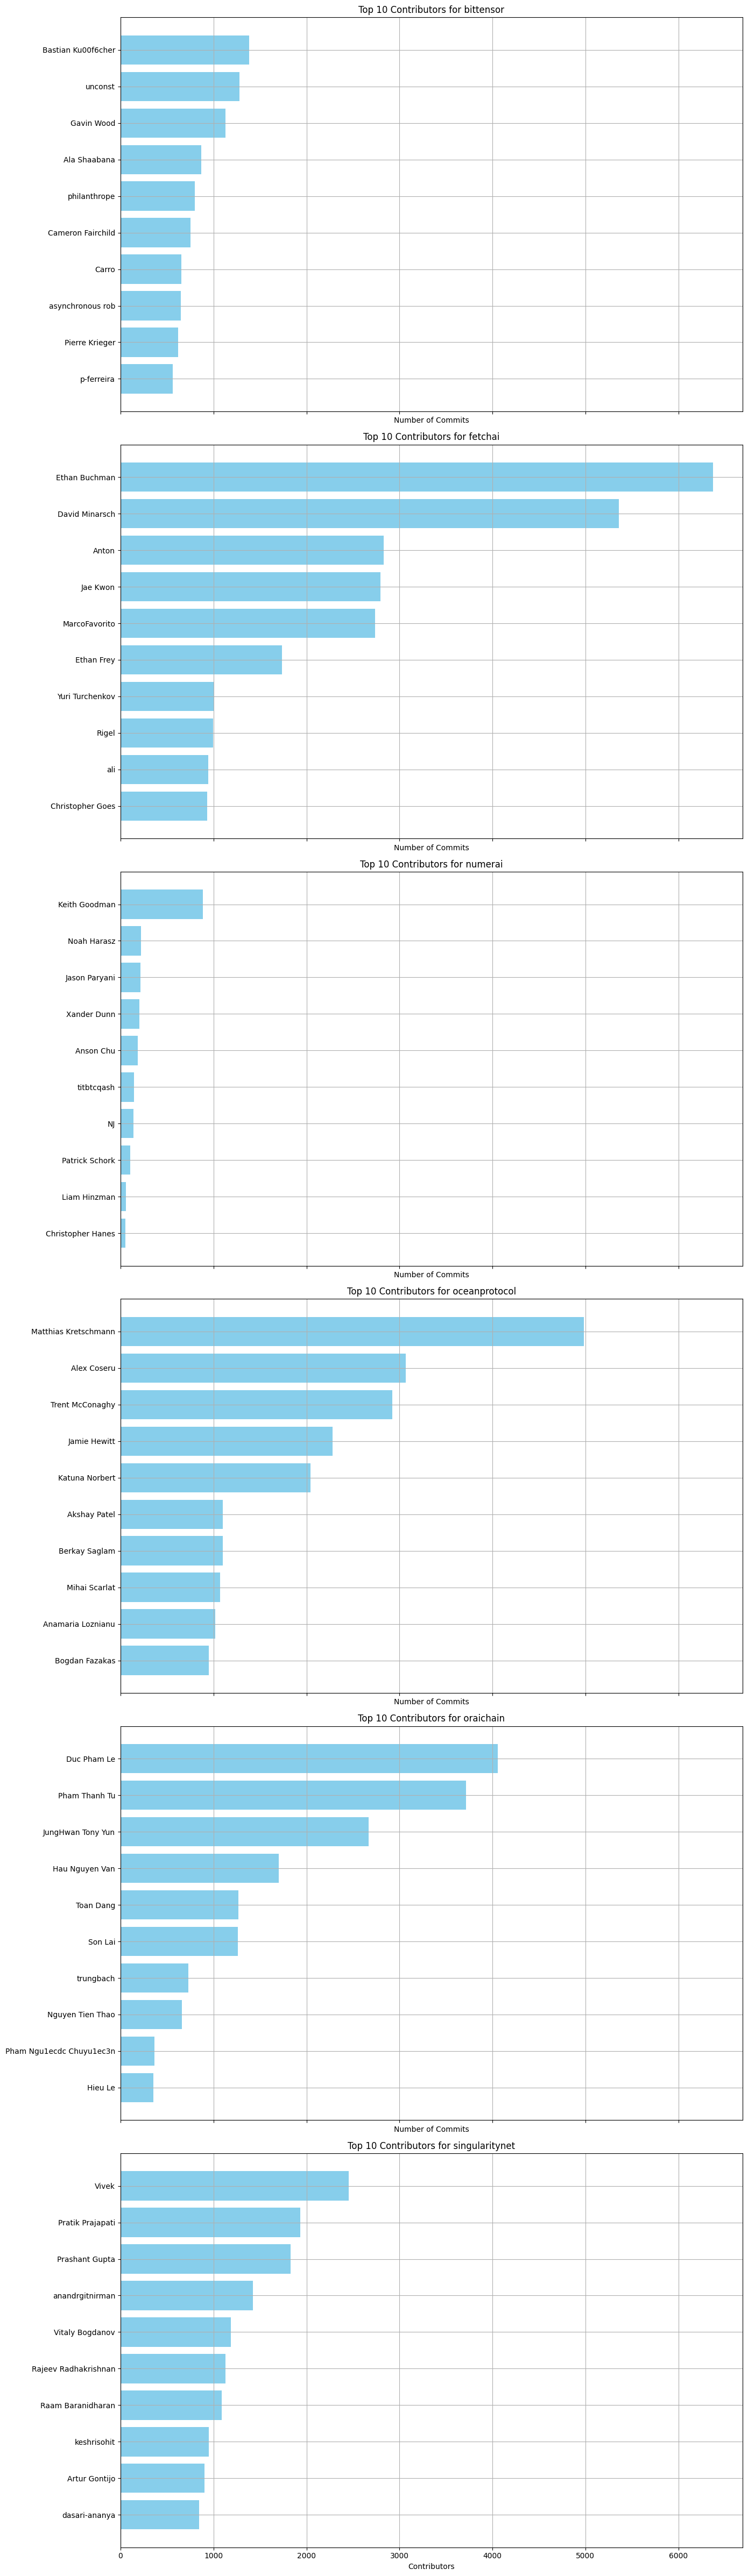

In [116]:
# Load the dataset
commits_df = pd.read_csv('output/commits.csv')

# Parse the dates for easier handling
commits_df['author_date'] = pd.to_datetime(commits_df['author_date'])
commits_df['year_month'] = commits_df['author_date'].dt.to_period('M')

# Exclude contributions from 'dependabot'
commits_df = commits_df[commits_df['normalized_author_name'] != 'Dependabot']

# Calculate the total number of commits per author
total_commits_per_author = commits_df.groupby('normalized_author_name').size().reset_index(name='commit_count')

# Get the top 10 contributors based on the number of commits
top_10_contributors = total_commits_per_author.nlargest(10, 'commit_count')

# Print the top 10 contributors
print("Top 10 Contributors Across All Projects:")
print(top_10_contributors)

# Plot the top 10 contributors based on the number of commits
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_10_contributors['normalized_author_name'], top_10_contributors['commit_count'], color='skyblue')
ax.set_xlabel('Number of Commits')
ax.set_title('Top 10 Contributors Across All Projects')
plt.gca().invert_yaxis()
plt.show()

# Calculate the number of commits per author per project
commits_per_author_per_project = commits_df.groupby(['project', 'normalized_author_name']).size().reset_index(name='commit_count')

# Get the top 10 contributors for each project
top_10_contributors_per_project = commits_per_author_per_project.groupby('project').apply(lambda x: x.nlargest(10, 'commit_count')).reset_index(drop=True)

# Print the top 10 contributors per project
print("Top 10 Contributors Per Project:")
print(top_10_contributors_per_project)

# Plot the top 5 contributors for each project
top_projects = top_10_contributors_per_project['project'].unique()

fig, axs = plt.subplots(len(top_projects), 1, figsize=(14, 8 * len(top_projects)), sharex=True)

for i, project in enumerate(top_projects):
    ax = axs[i]
    project_data = top_10_contributors_per_project[top_10_contributors_per_project['project'] == project]
    ax.barh(project_data['normalized_author_name'], project_data['commit_count'], color='skyblue')
    ax.set_title(f'Top 10 Contributors for {project}')
    ax.set_xlabel('Number of Commits')
    ax.invert_yaxis()
    ax.grid(True)

plt.xlabel('Contributors')
plt.tight_layout()
plt.show()


# Contributors - Evolution in time

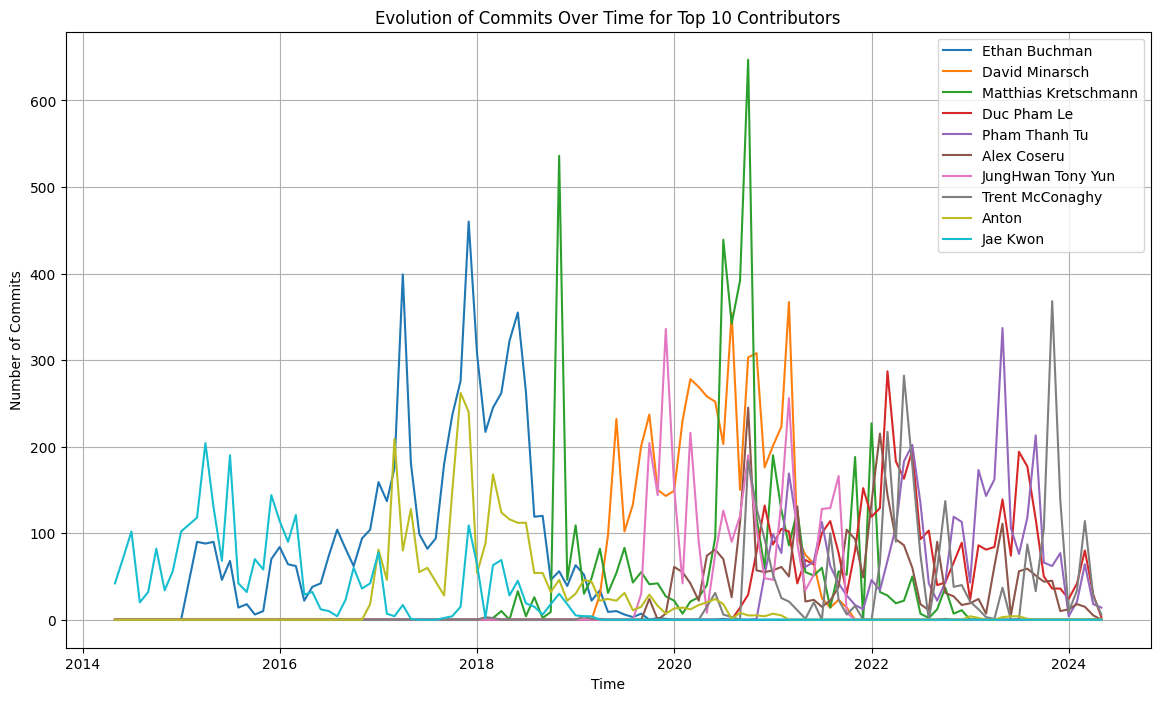

In [117]:
# Load the dataset
commits_df = pd.read_csv('output/commits.csv')

# Parse the dates for easier handling
commits_df['author_date'] = pd.to_datetime(commits_df['author_date'])
commits_df['year_month'] = commits_df['author_date'].dt.to_period('M')

# Exclude contributions from 'dependabot'
commits_df = commits_df[commits_df['normalized_author_name'] != 'Dependabot']

# Calculate the total number of commits per author
total_commits_per_author = commits_df.groupby('normalized_author_name').size().reset_index(name='commit_count')

# Get the top 10 contributors based on the number of commits
top_10_contributors = total_commits_per_author.nlargest(10, 'commit_count')

# Filter the commits for the top 10 contributors
top_10_contributors_names = top_10_contributors['normalized_author_name'].tolist()
top_10_commits_df = commits_df[commits_df['normalized_author_name'].isin(top_10_contributors_names)]

# Group by year_month and normalized_author_name to count commits
top_10_evolution = top_10_commits_df.groupby(['year_month', 'normalized_author_name']).size().reset_index(name='commit_count')

# Pivot the table to have normalized_author_name as columns and year_month as index
top_10_evolution_pivot = top_10_evolution.pivot(index='year_month', columns='normalized_author_name', values='commit_count').fillna(0)

# Plot the evolution in time for the top 10 contributors
plt.figure(figsize=(14, 8))

for contributor in top_10_contributors_names:
    plt.plot(top_10_evolution_pivot.index.to_timestamp(), top_10_evolution_pivot[contributor], label=contributor)

plt.xlabel('Time')
plt.ylabel('Number of Commits')
plt.title('Evolution of Commits Over Time for Top 10 Contributors')
plt.legend()
plt.grid(True)
plt.show()


# Top Repos by commits

Top 10 Repositories by Number of Commits Across All Projects:
            project                repository  commit_count
20        bittensor              polkadot-sdk         14774
33          fetchai                agents-aea         11311
81          fetchai                tendermint          8496
43          fetchai          cosmos-consensus          7768
45          fetchai                cosmos-sdk          6062
407  singularitynet  snet-marketplace-service          5378
286       oraichain                   owallet          4796
280       oraichain         oraiswap-frontend          3955
1         bittensor                 bittensor          3853
155   oceanprotocol                  pdr-docs          3852


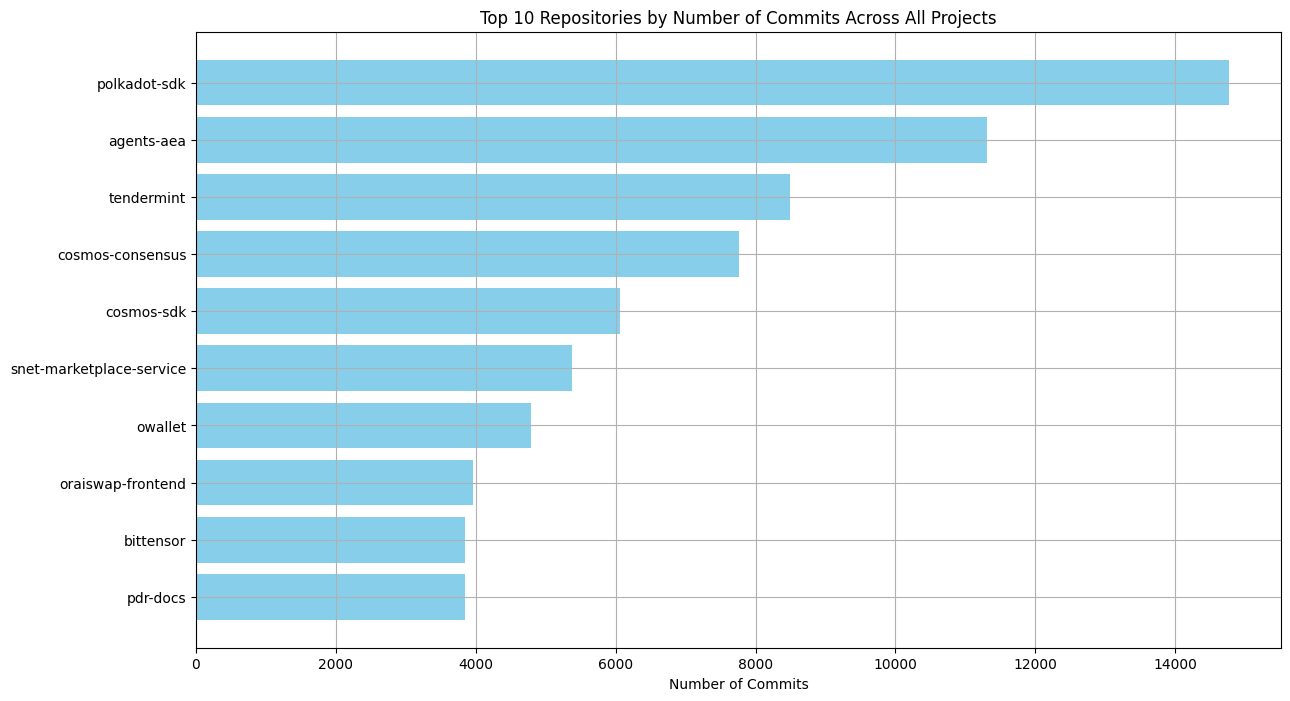


Top 10 Repositories by Number of Commits for Project: bittensor
      project      repository  commit_count
20  bittensor    polkadot-sdk         14774
1   bittensor       bittensor          3853
24  bittensor       subtensor          1211
21  bittensor       prompting           899
12  bittensor  developer-docs           621
17  bittensor        old-docs           602
30  bittensor      validators           555
29  bittensor  text-prompting           448
15  bittensor     mem-pytorch           313
22  bittensor           squid           276


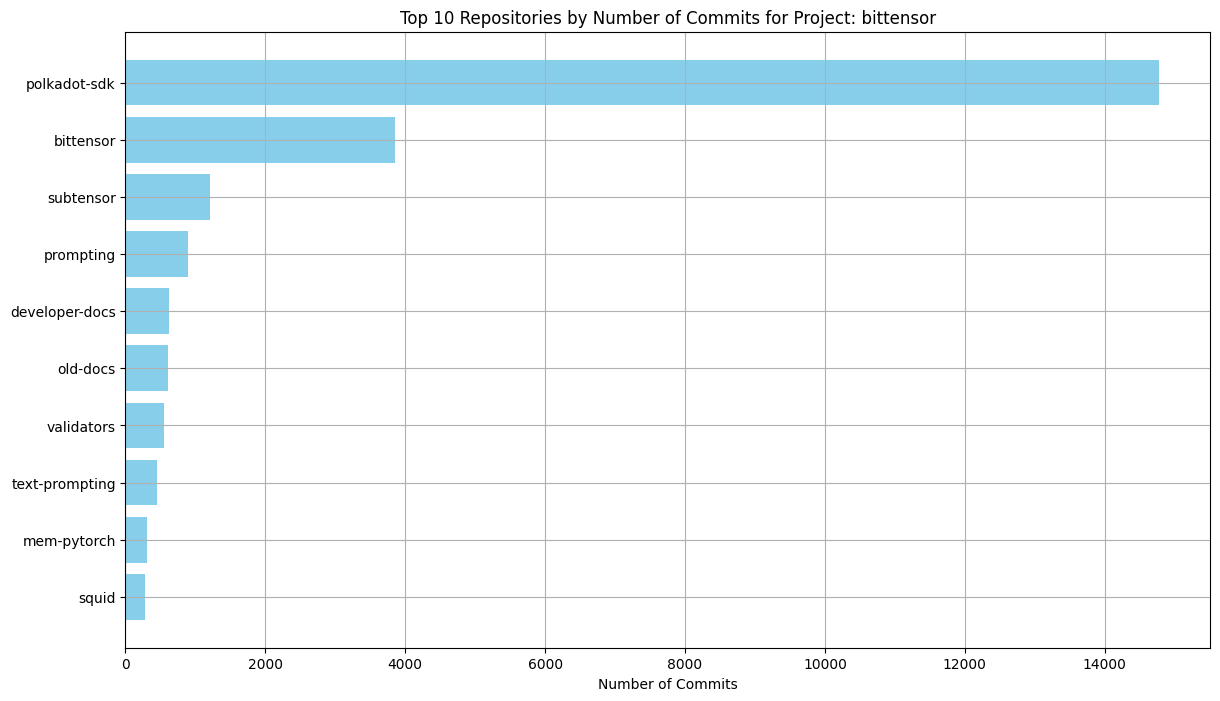


Top 10 Repositories by Number of Commits for Project: fetchai
    project        repository  commit_count
33  fetchai        agents-aea         11311
81  fetchai        tendermint          8496
43  fetchai  cosmos-consensus          7768
45  fetchai        cosmos-sdk          6062
67  fetchai            ledger          2056
70  fetchai    ledger-archive          1131
35  fetchai        agents-tac          1112
44  fetchai   cosmos-explorer           930
52  fetchai              docs           836
42  fetchai           colearn           707


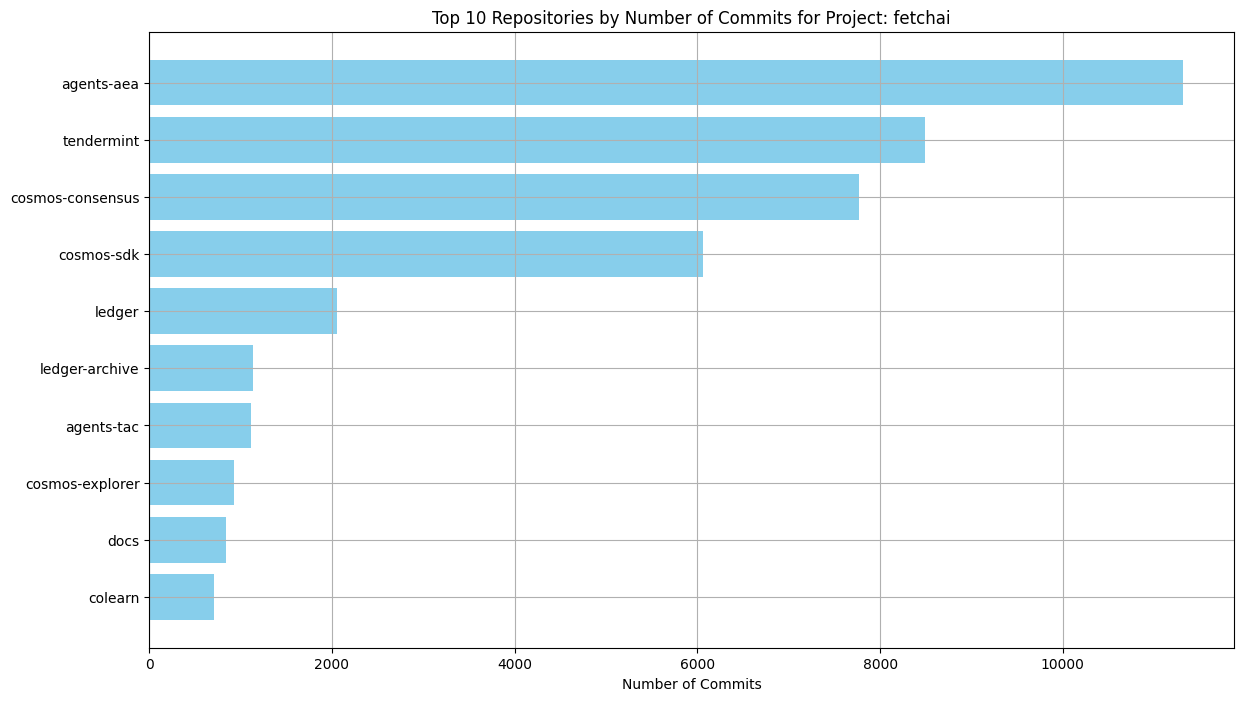


Top 10 Repositories by Number of Commits for Project: numerai
     project                 repository  commit_count
102  numerai                    numerox           904
89   numerai                       docs           447
94   numerai            example-scripts           297
106  numerai        submission-criteria           271
98   numerai                numerai-cli           217
92   numerai                    docs-jp           193
96   numerai   heroku-buildpack-polymer            69
100  numerai            numerai-predict            69
108  numerai  tournament-data-integrity            51
107  numerai       tournament-contracts            44


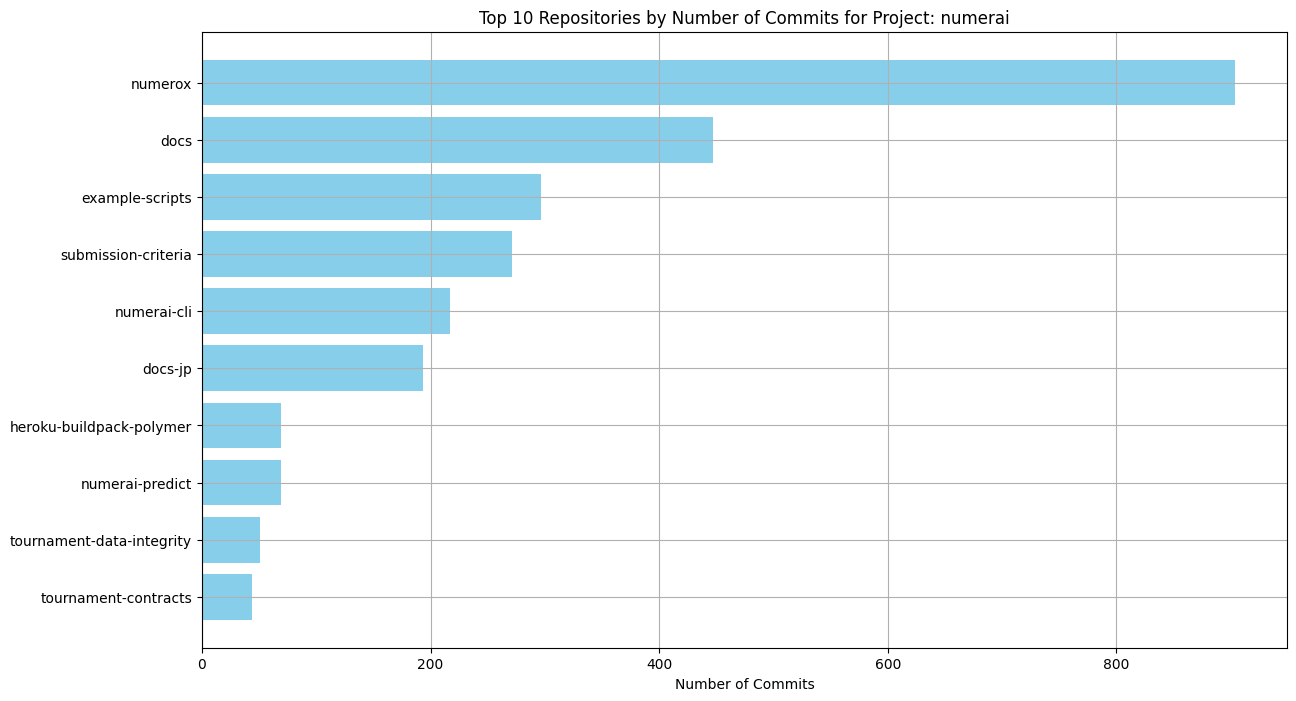


Top 10 Repositories by Number of Commits for Project: oceanprotocol
           project             repository  commit_count
155  oceanprotocol               pdr-docs          3852
127  oceanprotocol                   docs          3843
143  oceanprotocol               ocean.js          3124
138  oceanprotocol  marketplace-launchpad          3101
136  oceanprotocol                 market          2228
189  oceanprotocol                  waves          1894
125  oceanprotocol                 df-web          1713
120  oceanprotocol              contracts          1448
145  oceanprotocol               ocean.py          1390
113  oceanprotocol               aquarius          1366


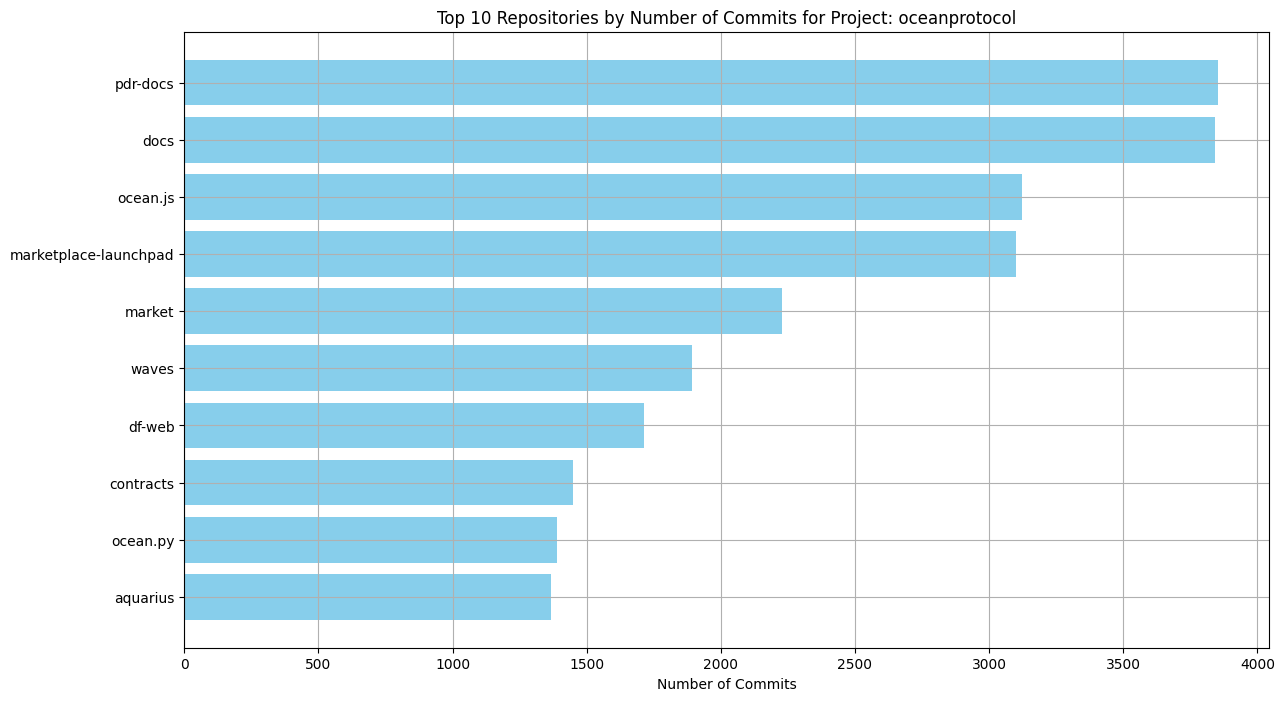


Top 10 Repositories by Number of Commits for Project: oraichain
       project            repository  commit_count
286  oraichain               owallet          4796
280  oraichain     oraiswap-frontend          3955
278  oraichain     oraiscan-frontend          2872
251  oraichain  keplr-extension-orai          1081
277  oraichain           oraidex-sdk          1077
294  oraichain          smart-studio           871
261  oraichain                  orai           797
279  oraichain              oraiswap           673
281  oraichain              oraiwasm           663
208  oraichain              cosmosjs           421


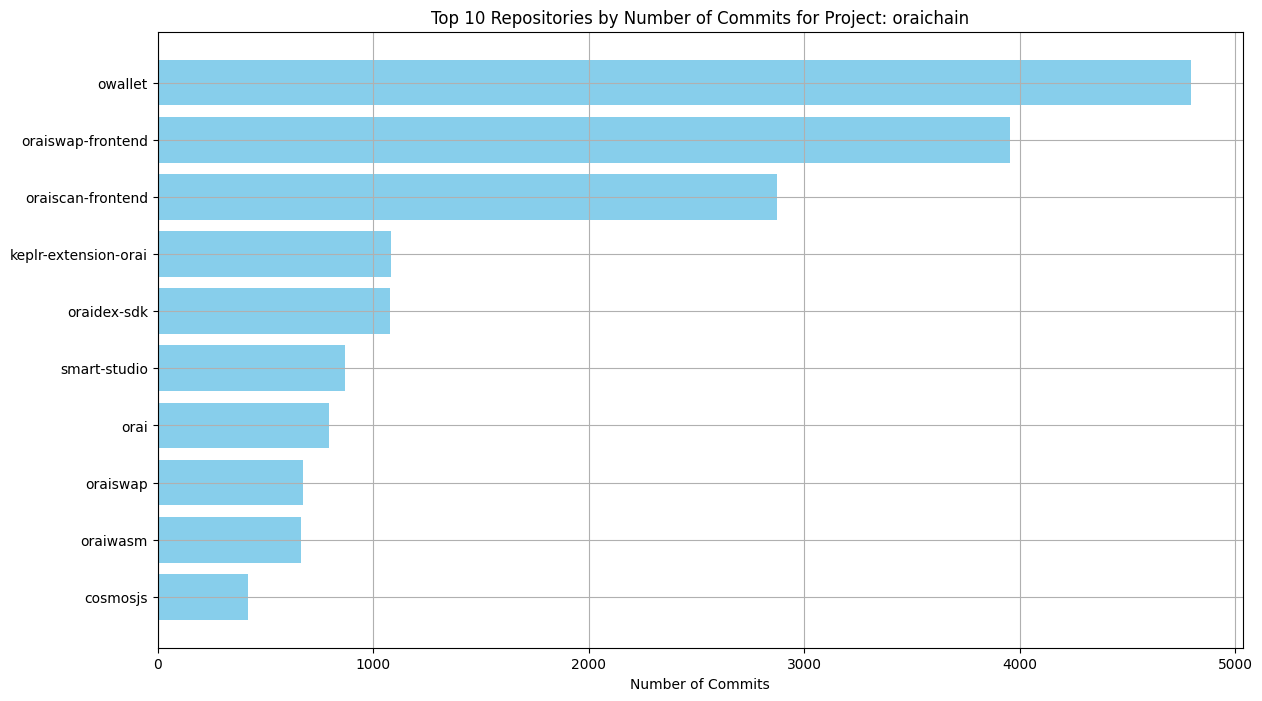


Top 10 Repositories by Number of Commits for Project: singularitynet
            project                repository  commit_count
407  singularitynet  snet-marketplace-service          5378
400  singularitynet                 snet-dapp          3389
399  singularitynet               snet-daemon          1759
346  singularitynet                dev-portal          1165
395  singularitynet                  snet-cli          1097
315  singularitynet          airdrop-services           834
391  singularitynet          snet-betav1-dapp           807
366  singularitynet                  offernet           716
313  singularitynet                    ai-dsl           707
314  singularitynet              airdrop-dapp           671


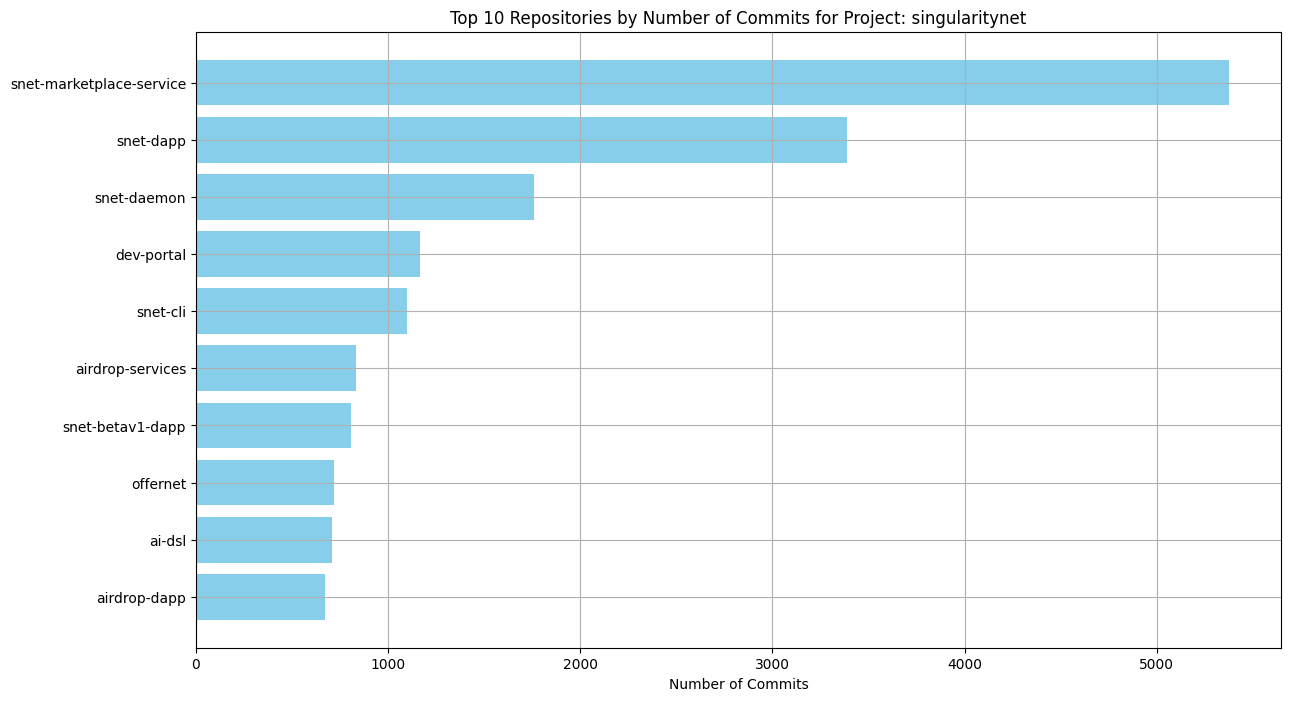

In [118]:

commits_file_path = 'output/commits.csv'
commits_df = pd.read_csv(commits_file_path)

# Group by project and repository to count the number of commits
commits_by_repo = commits_df.groupby(['project', 'repository']).size().reset_index(name='commit_count')

# 1. Top 10 repos by number of commits across all projects
top_10_repos_across_all = commits_by_repo.nlargest(10, 'commit_count')

# Print the top 10 repos across all projects
print("Top 10 Repositories by Number of Commits Across All Projects:")
print(top_10_repos_across_all)

# Plot the top 10 repos across all projects
plt.figure(figsize=(14, 8))
plt.barh(top_10_repos_across_all['repository'], top_10_repos_across_all['commit_count'], color='skyblue')
plt.xlabel('Number of Commits')
plt.title('Top 10 Repositories by Number of Commits Across All Projects')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# 2. Top 10 repos by number of commits per each project
top_projects = commits_by_repo['project'].unique()

for project in top_projects:
    project_data = commits_by_repo[commits_by_repo['project'] == project]
    top_10_repos_per_project = project_data.nlargest(10, 'commit_count')

    # Print the top 10 repos for each project
    print(f"\nTop 10 Repositories by Number of Commits for Project: {project}")
    print(top_10_repos_per_project)

    # Plot the top 10 repos for each project
    plt.figure(figsize=(14, 8))
    plt.barh(top_10_repos_per_project['repository'], top_10_repos_per_project['commit_count'], color='skyblue')
    plt.xlabel('Number of Commits')
    plt.title(f'Top 10 Repositories by Number of Commits for Project: {project}')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()


# Correlations

                Commit Count Correlation  Issue Count Correlation
numerai                        -0.051782                -0.024748
fetchai                        -0.213757                 0.027115
singularitynet                 -0.140068                -0.063124
bittensor                       0.199406                 0.373972
oraichain                       0.179720                 0.094673
oceanprotocol                   0.066736                 0.279238
0                                    NaN                      NaN


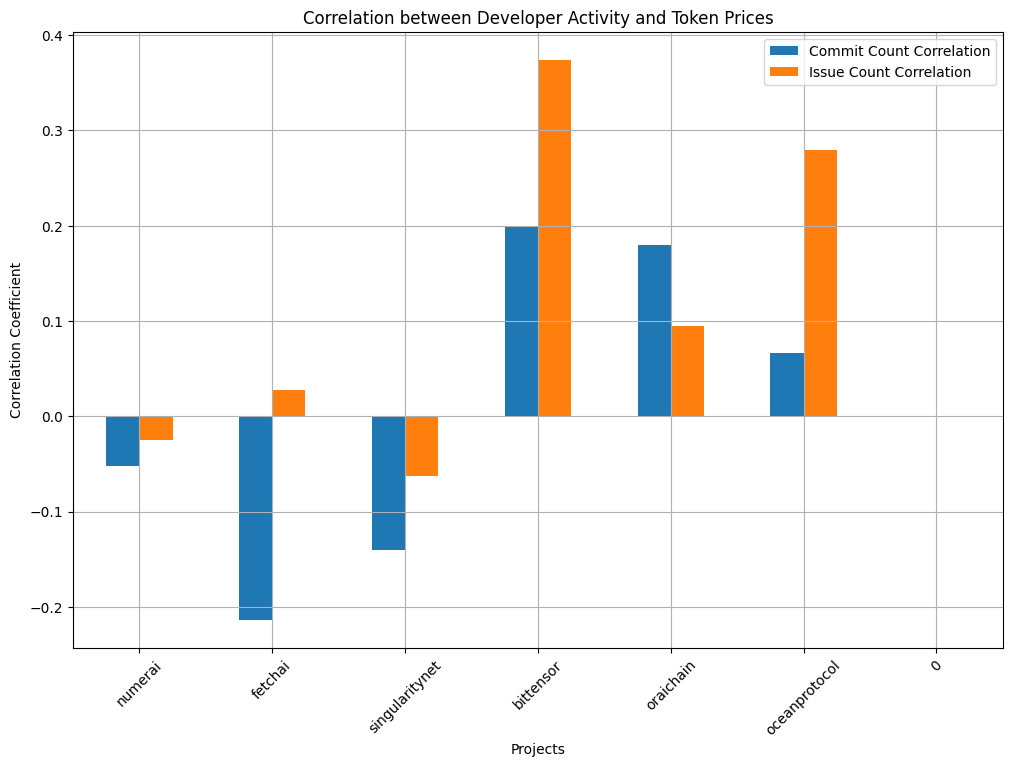

In [119]:
# Load the datasets
commits_df = pd.read_csv('output/commits.csv')
issues_df = pd.read_csv('output/issues.csv')
prices_df = pd.read_csv('output/prices.csv')
repos_df = pd.read_csv('output/repos.csv')

# Convert date columns to datetime
commits_df['author_date'] = pd.to_datetime(commits_df['author_date'])
issues_df['created_at'] = pd.to_datetime(issues_df['created_at'])
prices_df['Date'] = pd.to_datetime(prices_df['Date'])

# Aggregate commits by date and project
commits_agg = commits_df.groupby([commits_df['author_date'].dt.date, 'project']).size().reset_index(name='commit_count')
commits_agg.rename(columns={'author_date': 'date'}, inplace=True)

# Aggregate issues by date and project
issues_agg = issues_df.groupby([issues_df['created_at'].dt.date, 'project']).size().reset_index(name='issue_count')
issues_agg.rename(columns={'created_at': 'date'}, inplace=True)

# Merge aggregated commits and issues with token prices
activity_df = pd.merge(commits_agg, issues_agg, on=['date', 'project'], how='outer')
activity_df['date'] = pd.to_datetime(activity_df['date'])  # Ensure the date is in datetime format
activity_df = pd.merge(activity_df, prices_df, left_on=['date', 'project'], right_on=['Date', 'Project'], how='outer')

# Fill NaN values with 0
activity_df.fillna(0, inplace=True)

# Drop unnecessary columns
activity_df.drop(columns=['Date', 'Project'], inplace=True)

# Calculate the correlation for each project
correlation_results = {}

for project in activity_df['project'].unique():
    project_data = activity_df[activity_df['project'] == project]
    correlations = project_data[['commit_count', 'issue_count', 'Close']].corr()
    correlation_results[project] = correlations.loc['Close', ['commit_count', 'issue_count']]

# Display the correlation results
correlation_results_df = pd.DataFrame(correlation_results).T
correlation_results_df.columns = ['Commit Count Correlation', 'Issue Count Correlation']

print(correlation_results_df)

# Plot the correlation results
correlation_results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Correlation between Developer Activity and Token Prices')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Projects')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Time lags

<Figure size 1200x800 with 0 Axes>

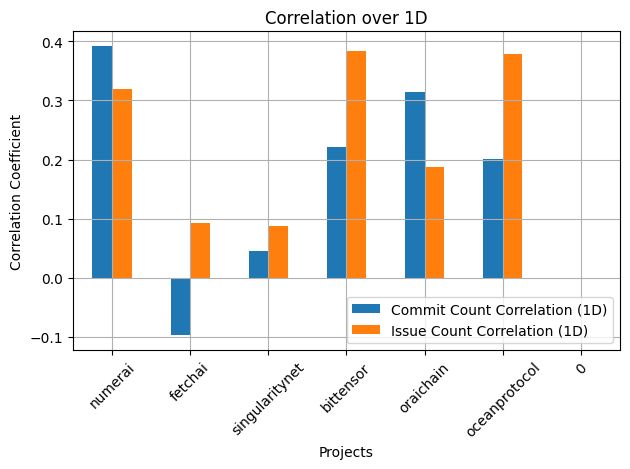

<Figure size 1200x800 with 0 Axes>

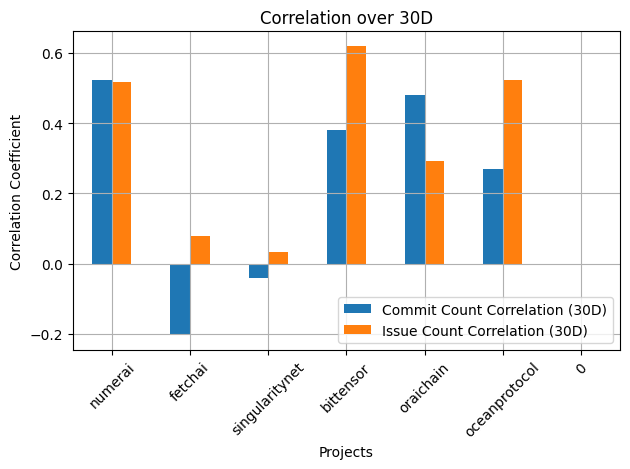

<Figure size 1200x800 with 0 Axes>

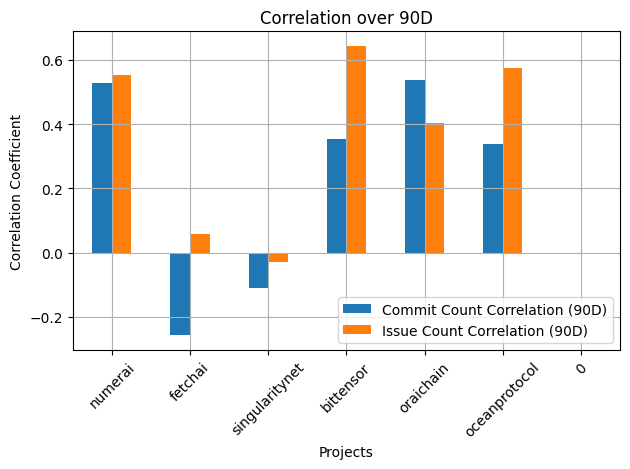

<Figure size 1200x800 with 0 Axes>

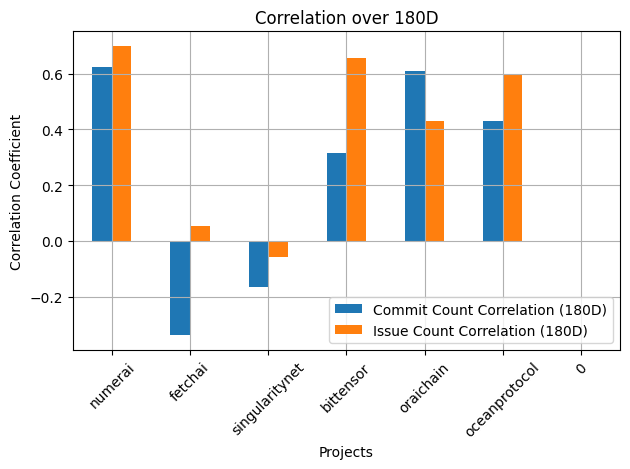

<Figure size 1200x800 with 0 Axes>

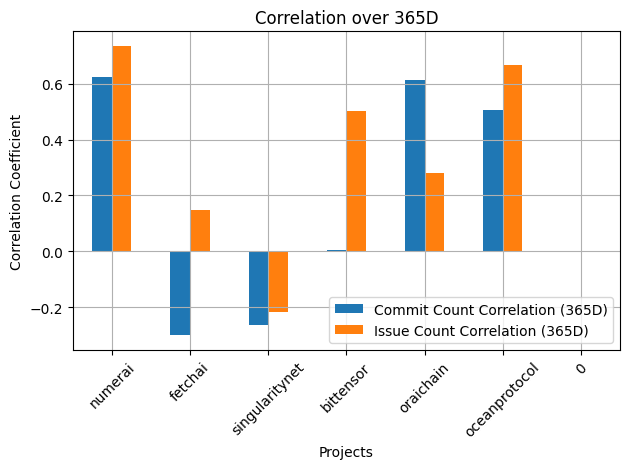

<Figure size 1200x800 with 0 Axes>

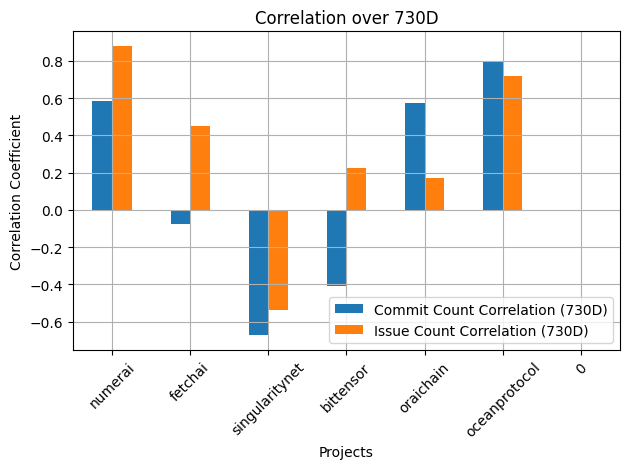

<Figure size 1200x800 with 0 Axes>

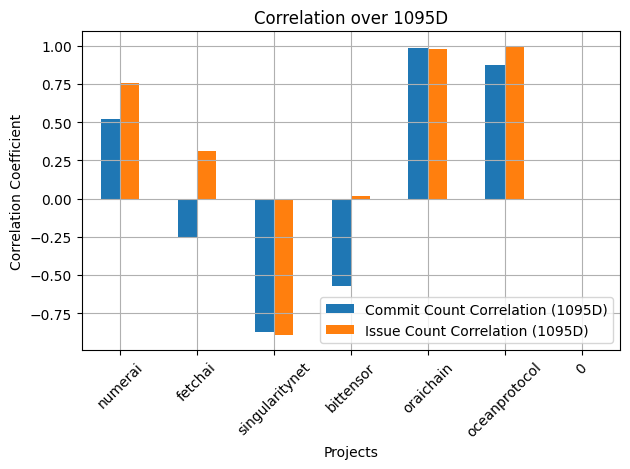

Correlation Results for 1D:


Commit Count Correlation (1D)  Issue Count Correlation (1D)
numerai                              0.392258                      0.319504
fetchai                             -0.097499                      0.092578
singularitynet                       0.044985                      0.086725
bittensor                            0.220415                      0.383431
oraichain                            0.313697                      0.187064
oceanprotocol                        0.201330                      0.377909
0                                         NaN                           NaN

Correlation Results for 30D:


Commit Count Correlation (30D)  Issue Count Correlation (30D)
numerai                               0.522900                       0.516003
fetchai                              -0.204451                       0.078986
singularitynet                       -0.040948                       0.033583
bittensor                             0.379376                       0.620375
oraichain                             0.479816                       0.292727
oceanprotocol                         0.270960                       0.522825
0                                          NaN                            NaN

Correlation Results for 90D:


Commit Count Correlation (90D)  Issue Count Correlation (90D)
numerai                               0.529612                       0.552793
fetchai                              -0.258388                       0.056982
singularitynet                       -0.111808                      -0.031062
bittensor                             0.354315                       0.644007
oraichain                             0.536497                       0.403543
oceanprotocol                         0.337871                       0.576254
0                                          NaN                            NaN

Correlation Results for 180D:


Commit Count Correlation (180D)  \
numerai                                0.625503   
fetchai                               -0.339686   
singularitynet                        -0.166825   
bittensor                              0.314909   
oraichain                              0.610741   
oceanprotocol                          0.429715   
0                                           NaN   

                Issue Count Correlation (180D)  
numerai                               0.699750  
fetchai                               0.051950  
singularitynet                       -0.058384  
bittensor                             0.655541  
oraichain                             0.428421  
oceanprotocol                         0.596669  
0                                          NaN

Correlation Results for 365D:


Commit Count Correlation (365D)  \
numerai                                0.624160   
fetchai                               -0.301098   
singularitynet                        -0.263210   
bittensor                              0.006275   
oraichain                              0.612111   
oceanprotocol                          0.507329   
0                                           NaN   

                Issue Count Correlation (365D)  
numerai                               0.735366  
fetchai                               0.147396  
singularitynet                       -0.217178  
bittensor                             0.501624  
oraichain                             0.280169  
oceanprotocol                         0.667742  
0                                          NaN

Correlation Results for 730D:


Commit Count Correlation (730D)  \
numerai                                0.586515   
fetchai                               -0.078111   
singularitynet                        -0.673927   
bittensor                             -0.411201   
oraichain                              0.571624   
oceanprotocol                          0.796228   
0                                           NaN   

                Issue Count Correlation (730D)  
numerai                               0.880574  
fetchai                               0.452037  
singularitynet                       -0.539665  
bittensor                             0.223197  
oraichain                             0.170328  
oceanprotocol                         0.721019  
0                                          NaN

Correlation Results for 1095D:


Commit Count Correlation (1095D)  \
numerai                                 0.517401   
fetchai                                -0.255271   
singularitynet                         -0.870393   
bittensor                              -0.574906   
oraichain                               0.987140   
oceanprotocol                           0.875866   
0                                            NaN   

                Issue Count Correlation (1095D)  
numerai                                0.753704  
fetchai                                0.313987  
singularitynet                        -0.895771  
bittensor                              0.014304  
oraichain                              0.976114  
oceanprotocol                          0.999447  
0                                           NaN

In [120]:
commits_df = pd.read_csv('output/commits.csv')
issues_df = pd.read_csv('output/issues.csv')
prices_df = pd.read_csv('output/prices.csv')

# Convert date columns to datetime
commits_df['author_date'] = pd.to_datetime(commits_df['author_date'])
issues_df['created_at'] = pd.to_datetime(issues_df['created_at'])
prices_df['Date'] = pd.to_datetime(prices_df['Date'])

# Aggregate commits and issues by date and project
commits_agg = commits_df.groupby([commits_df['author_date'].dt.date, 'project']).size().reset_index(name='commit_count')
issues_agg = issues_df.groupby([issues_df['created_at'].dt.date, 'project']).size().reset_index(name='issue_count')
commits_agg.rename(columns={'author_date': 'date'}, inplace=True)
issues_agg.rename(columns={'created_at': 'date'}, inplace=True)
commits_agg['date'] = pd.to_datetime(commits_agg['date'])
issues_agg['date'] = pd.to_datetime(issues_agg['date'])

# Merge aggregated commits and issues with token prices
activity_df = pd.merge(commits_agg, issues_agg, on=['date', 'project'], how='outer')
activity_df = pd.merge(activity_df, prices_df, left_on=['date', 'project'], right_on=['Date', 'Project'], how='outer')
activity_df.fillna(0, inplace=True)
activity_df.drop(columns=['Date', 'Project'], inplace=True)

def calculate_timeframe_correlations(df, timeframes):
    results = {}
    for timeframe in timeframes:
        timeframe_results = {}
        for project in df['project'].unique():
            project_data = df[df['project'] == project].copy()
            project_data.set_index('date', inplace=True)
            project_data.index = pd.to_datetime(project_data.index)
            project_data = project_data.resample(timeframe).sum(numeric_only=True)
            correlations = project_data[['commit_count', 'issue_count', 'Close']].corr()
            timeframe_results[project] = correlations.loc['Close', ['commit_count', 'issue_count']]
        results[timeframe] = pd.DataFrame(timeframe_results).T
        results[timeframe].columns = [f'Commit Count Correlation ({timeframe})', f'Issue Count Correlation ({timeframe})']
    return results

# Define the timeframes
timeframes = ['1D', '30D', '90D', '180D', '365D', '730D', '1095D']

# Calculate correlations for different timeframes
timeframe_correlation_results = calculate_timeframe_correlations(activity_df, timeframes)

# Plot the results
for timeframe in timeframes:
    plt.figure(figsize=(12, 8))
    timeframe_correlation_results[timeframe].plot(kind='bar')
    plt.title(f'Correlation over {timeframe}')
    plt.ylabel('Correlation Coefficient')
    plt.xlabel('Projects')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Display the correlation results for each timeframe
for timeframe in timeframes:
    print(f"Correlation Results for {timeframe}:")
    display(timeframe_correlation_results[timeframe])



# Correlation Evolution 1d - 3Y per Project

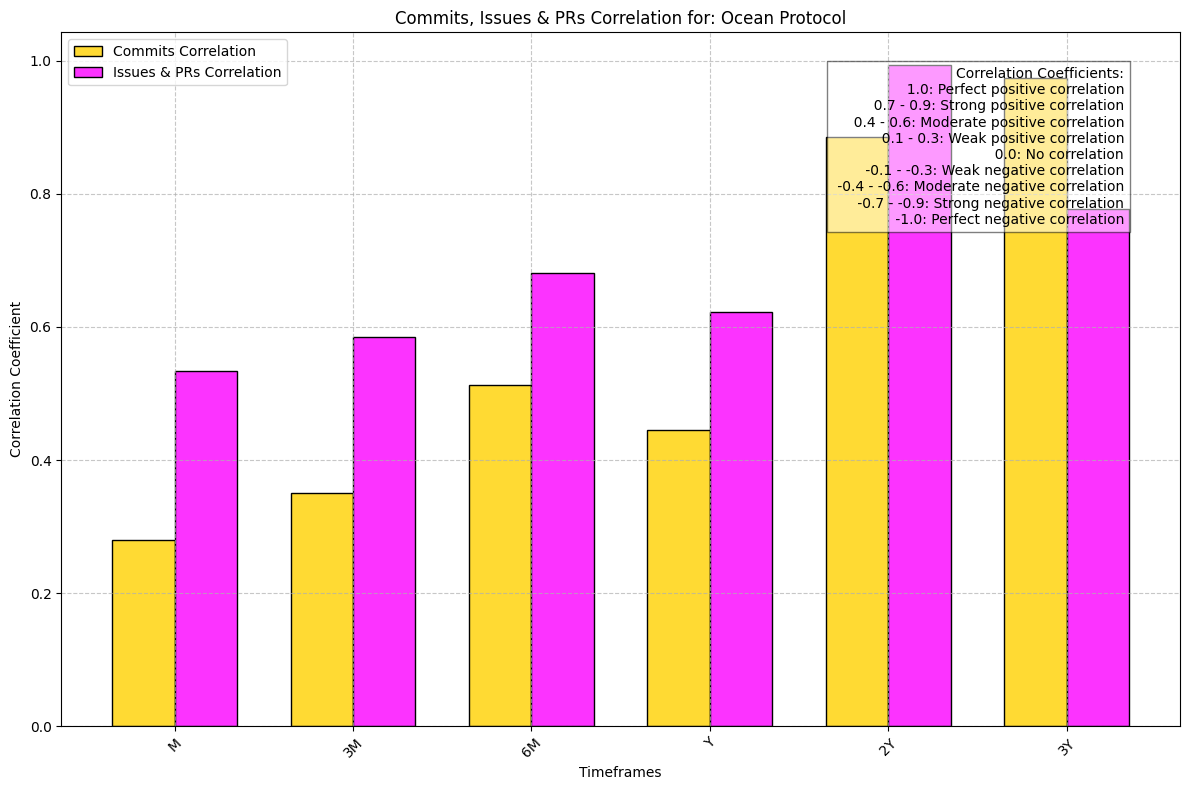

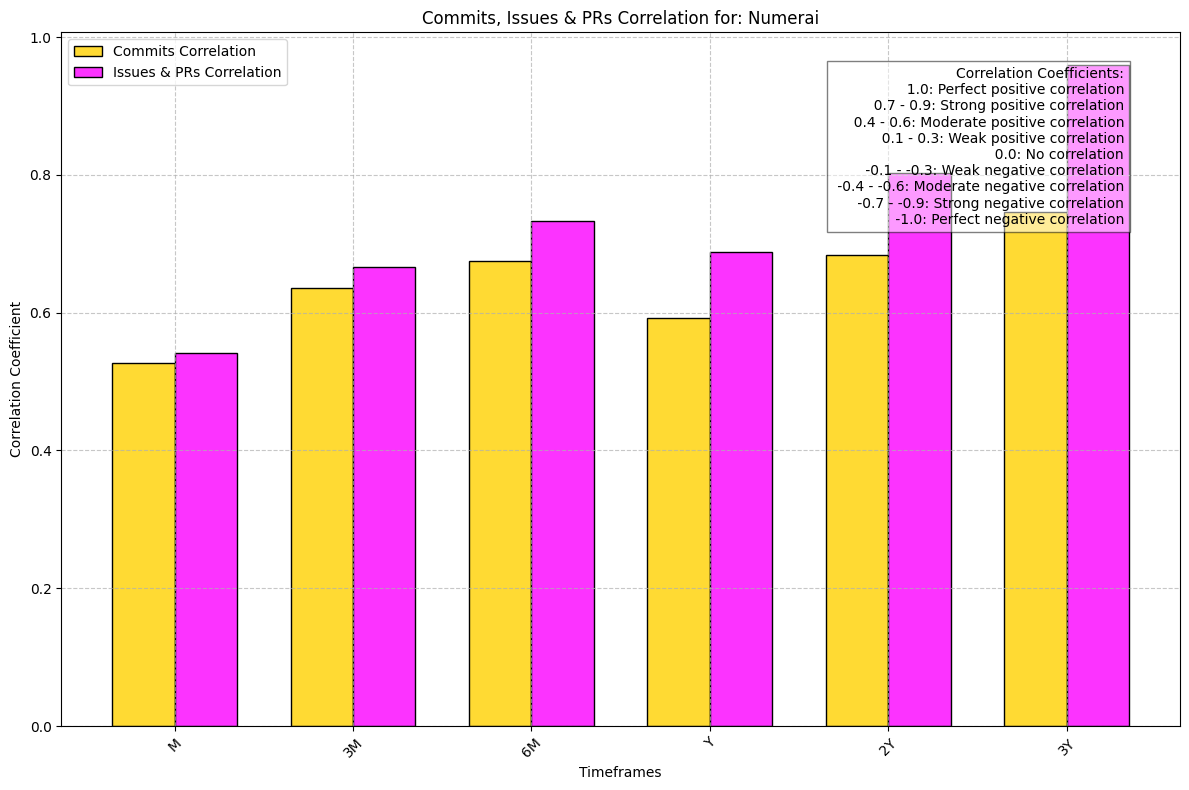

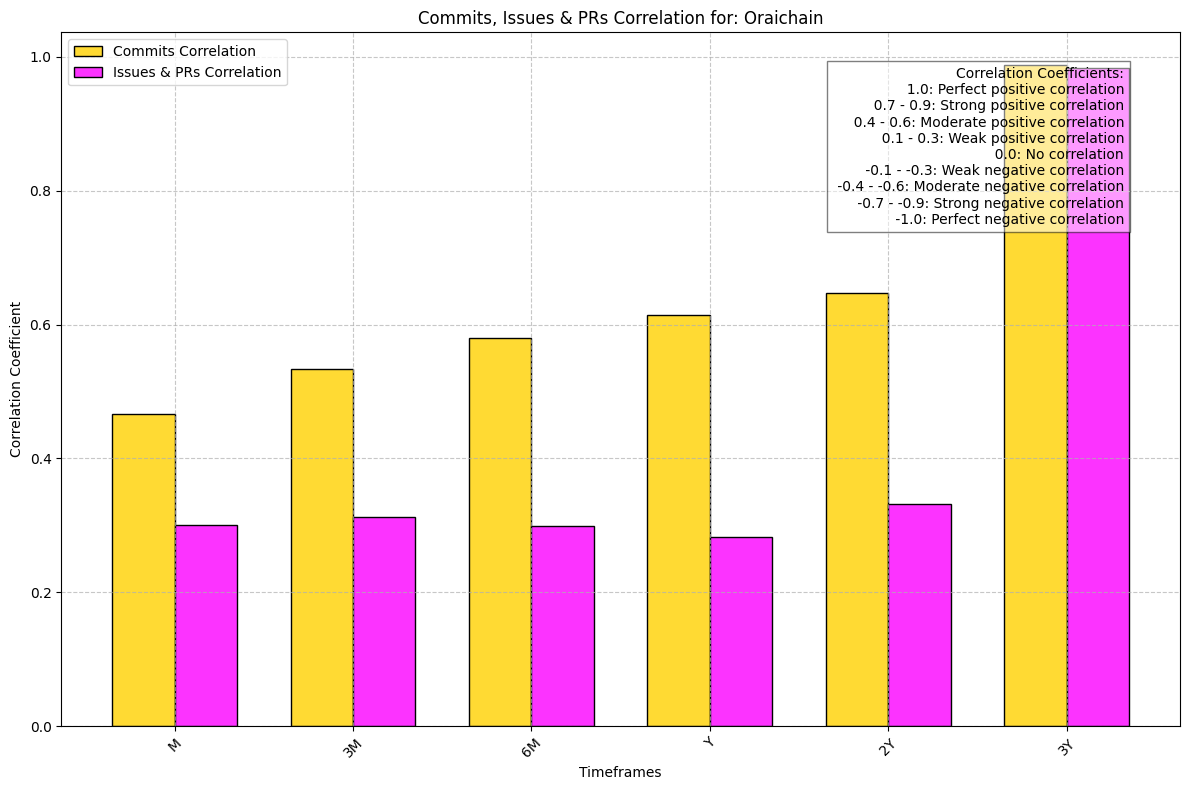

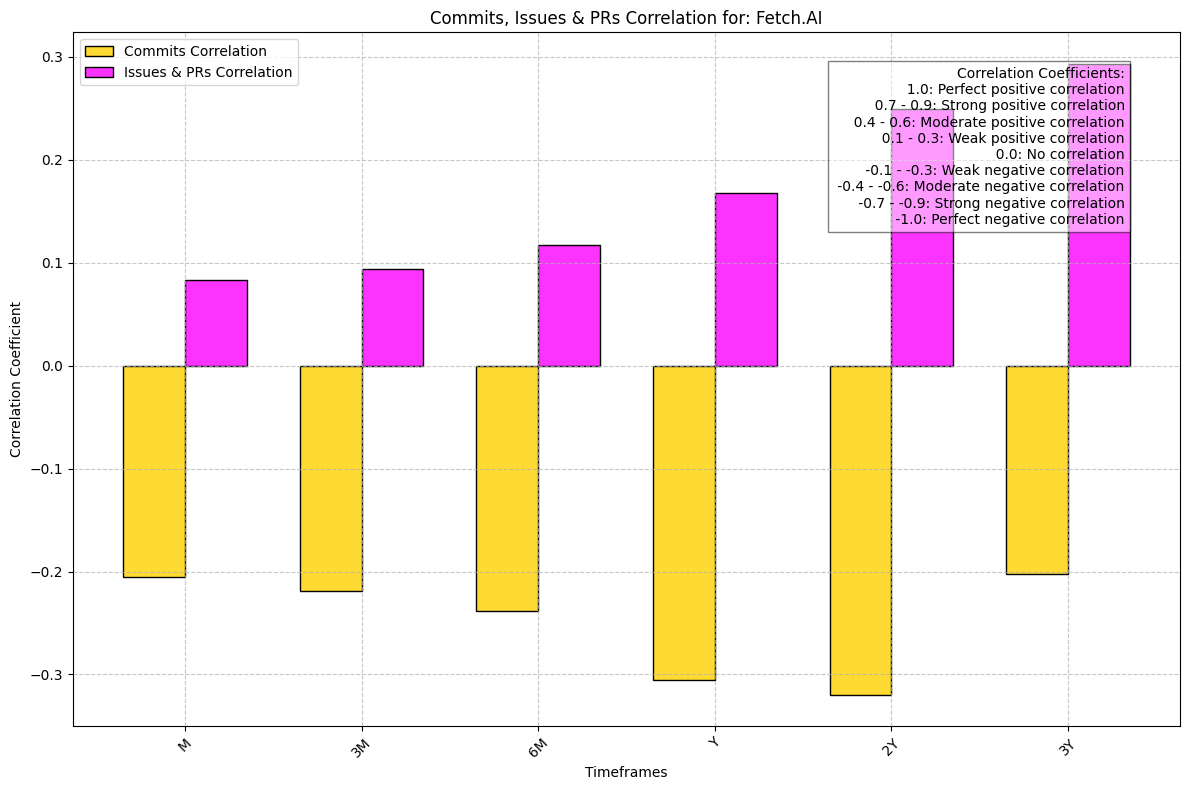

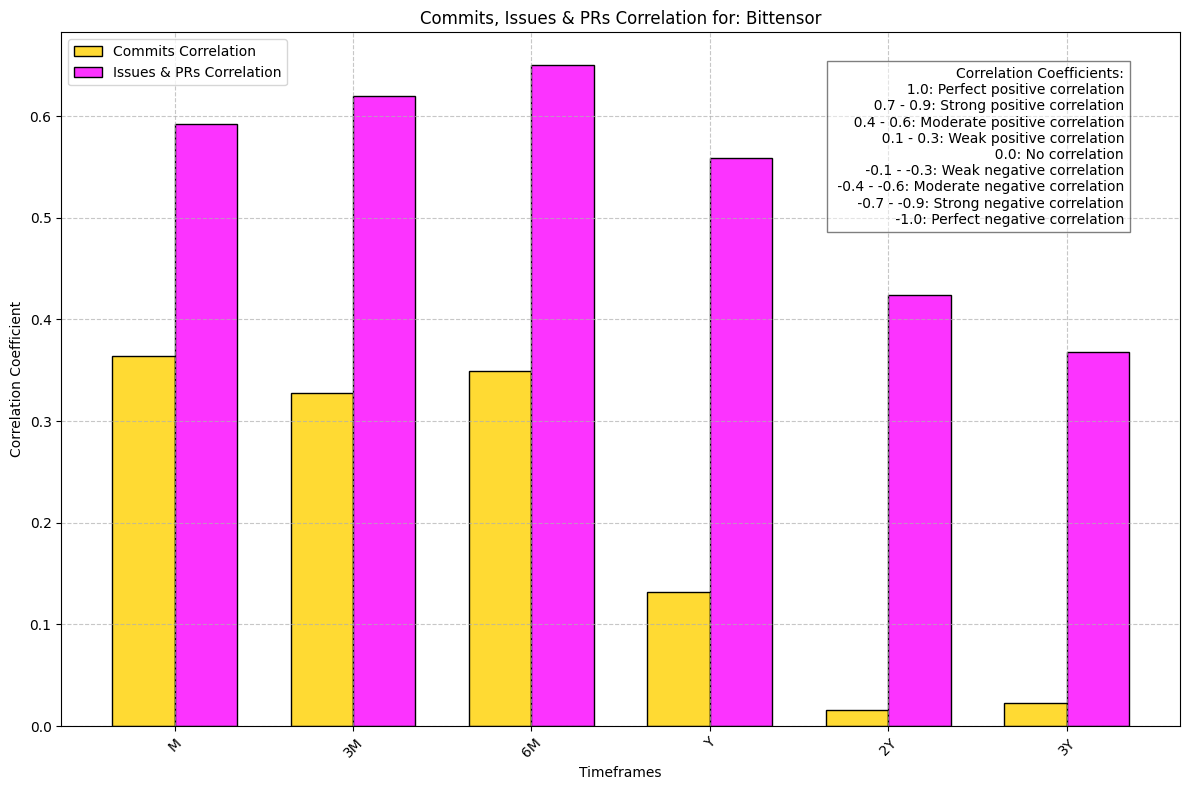

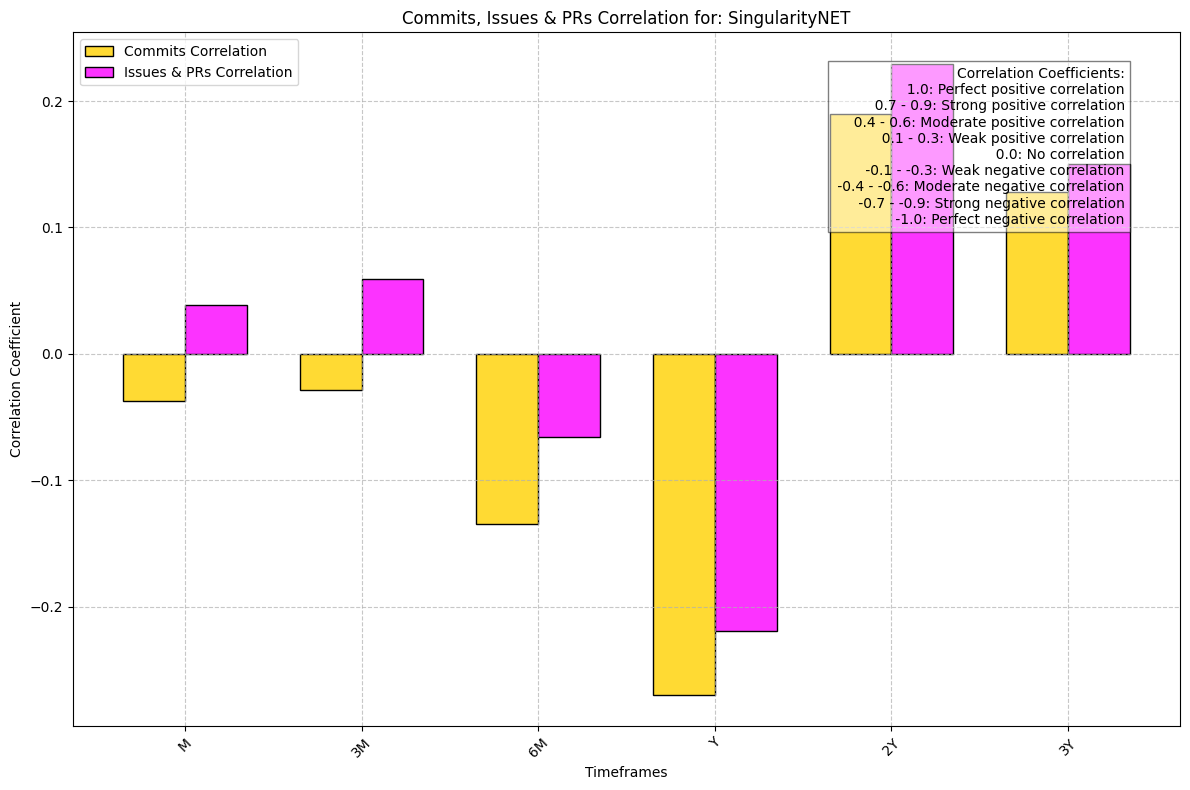

Correlation Results for M:


Commit Count Correlation (M)  Issue Count Correlation (M)
numerai                             0.527556                     0.540802
fetchai                            -0.205229                     0.083029
singularitynet                     -0.036981                     0.038393
bittensor                           0.364166                     0.592056
oraichain                           0.466918                     0.300432
oceanprotocol                       0.279484                     0.534140
0                                        NaN                          NaN

Correlation Results for 3M:


Commit Count Correlation (3M)  Issue Count Correlation (3M)
numerai                              0.636152                      0.665749
fetchai                             -0.219220                      0.094217
singularitynet                      -0.028933                      0.059431
bittensor                            0.327727                      0.619581
oraichain                            0.533233                      0.312197
oceanprotocol                        0.350964                      0.585124
0                                         NaN                           NaN

Correlation Results for 6M:


Commit Count Correlation (6M)  Issue Count Correlation (6M)
numerai                              0.675688                      0.732890
fetchai                             -0.238317                      0.117578
singularitynet                      -0.135032                     -0.065723
bittensor                            0.349251                      0.649885
oraichain                            0.580437                      0.298667
oceanprotocol                        0.512184                      0.681600
0                                         NaN                           NaN

Correlation Results for Y:


Commit Count Correlation (Y)  Issue Count Correlation (Y)
numerai                             0.592939                     0.688492
fetchai                            -0.305301                     0.167288
singularitynet                     -0.269628                    -0.219489
bittensor                           0.132011                     0.559242
oraichain                           0.613785                     0.283083
oceanprotocol                       0.445353                     0.622744
0                                        NaN                          NaN

Correlation Results for 2Y:


Commit Count Correlation (2Y)  Issue Count Correlation (2Y)
numerai                              0.683275                      0.803078
fetchai                             -0.319455                      0.249241
singularitynet                       0.190159                      0.229489
bittensor                            0.015768                      0.423911
oraichain                            0.647465                      0.331865
oceanprotocol                        0.885711                      0.993296
0                                         NaN                           NaN

Correlation Results for 3Y:


Commit Count Correlation (3Y)  Issue Count Correlation (3Y)
numerai                              0.746320                      0.958897
fetchai                             -0.202177                      0.293010
singularitynet                       0.127873                      0.150490
bittensor                            0.022840                      0.367505
oraichain                            0.987286                      0.982856
oceanprotocol                        0.974944                      0.777920
0                                         NaN                           NaN

In [121]:
# Load the dataset
commits_df = pd.read_csv('output/commits.csv')
issues_df = pd.read_csv('output/issues.csv')
prices_df = pd.read_csv('output/prices.csv')

# Convert date columns to datetime
commits_df['author_date'] = pd.to_datetime(commits_df['author_date'])
issues_df['created_at'] = pd.to_datetime(issues_df['created_at'])
prices_df['Date'] = pd.to_datetime(prices_df['Date'])

# Aggregate commits and issues by date and project
commits_agg = commits_df.groupby([commits_df['author_date'].dt.date, 'project']).size().reset_index(name='commit_count')
issues_agg = issues_df.groupby([issues_df['created_at'].dt.date, 'project']).size().reset_index(name='issue_count')
commits_agg.rename(columns={'author_date': 'date'}, inplace=True)
issues_agg.rename(columns={'created_at': 'date'}, inplace=True)
commits_agg['date'] = pd.to_datetime(commits_agg['date'])
issues_agg['date'] = pd.to_datetime(issues_agg['date'])

# Merge aggregated commits and issues with token prices
activity_df = pd.merge(commits_agg, issues_agg, on=['date', 'project'], how='outer')
activity_df = pd.merge(activity_df, prices_df, left_on=['date', 'project'], right_on=['Date', 'Project'], how='outer')
activity_df.fillna(0, inplace=True)
activity_df.drop(columns=['Date', 'Project'], inplace=True)

def calculate_timeframe_correlations(df, timeframes):
    results = {}
    for timeframe in timeframes:
        timeframe_results = {}
        for project in df['project'].unique():
            project_data = df[df['project'] == project].copy()
            project_data.set_index('date', inplace=True)
            project_data.index = pd.to_datetime(project_data.index)
            project_data = project_data.resample(timeframe).sum(numeric_only=True)
            correlations = project_data[['commit_count', 'issue_count', 'Close']].corr()
            timeframe_results[project] = correlations.loc['Close', ['commit_count', 'issue_count']]
        results[timeframe] = pd.DataFrame(timeframe_results).T
        results[timeframe].columns = [f'Commit Count Correlation ({timeframe})', f'Issue Count Correlation ({timeframe})']
    return results

# Define the timeframes
timeframes = ['M', '3M', '6M', 'Y', '2Y', '3Y']

# Calculate correlations for different timeframes
timeframe_correlation_results = calculate_timeframe_correlations(activity_df, timeframes)

# List of projects for iteration
projects = [{"oceanprotocol": "Ocean Protocol"},
            {"numerai": "Numerai"},
            {"oraichain": "Oraichain"},
            {"fetchai": "Fetch.AI"},
            {"bittensor": "Bittensor"},
            {"singularitynet": "SingularityNET"}]

# Plot the results for each project
for project_dict in projects:
    for project_key, project_name in project_dict.items():
        commit_correlations = []
        issue_correlations = []
        labels = []

        for timeframe in timeframes:
            commit_correlations.append(timeframe_correlation_results[timeframe].loc[project_key][0])
            issue_correlations.append(timeframe_correlation_results[timeframe].loc[project_key][1])
            labels.append(timeframe)

        x = range(len(timeframes))

        plt.figure(figsize=(12, 8))
        bar_width = 0.35

        # Plotting bars
        bars1 = plt.bar([p - bar_width/2 for p in x], commit_correlations, width=bar_width, label='Commits Correlation',
                        color='#FFDA33', edgecolor='black')
        bars2 = plt.bar([p + bar_width/2 for p in x], issue_correlations, width=bar_width, label='Issues & PRs Correlation',
                        color='#FC33FF', edgecolor='black')

        plt.title(f'Commits, Issues & PRs Correlation for: {project_name}')
        plt.xlabel('Timeframes')
        plt.ylabel('Correlation Coefficient')
        plt.xticks(x, labels, rotation=45)
        plt.legend(loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.7)

        # Add explanation legend
        textstr = '\n'.join((
            'Correlation Coefficients:',
            '  1.0: Perfect positive correlation',
            '  0.7 - 0.9: Strong positive correlation',
            '  0.4 - 0.6: Moderate positive correlation',
            '  0.1 - 0.3: Weak positive correlation',
            '  0.0: No correlation',
            ' -0.1 - -0.3: Weak negative correlation',
            ' -0.4 - -0.6: Moderate negative correlation',
            ' -0.7 - -0.9: Strong negative correlation',
            ' -1.0: Perfect negative correlation'
        ))
        plt.gcf().text(0.95, 0.95, textstr, fontsize=10, bbox=dict(facecolor='white', alpha=0.5),
                       ha='right', va='top', transform=plt.gca().transAxes)

        plt.tight_layout()
        plt.show()

# Display the correlation results for each timeframe
for timeframe in timeframes:
    print(f"Correlation Results for {timeframe}:")
    display(timeframe_correlation_results[timeframe])


# Tweets Correlations




<Figure size 1400x800 with 0 Axes>

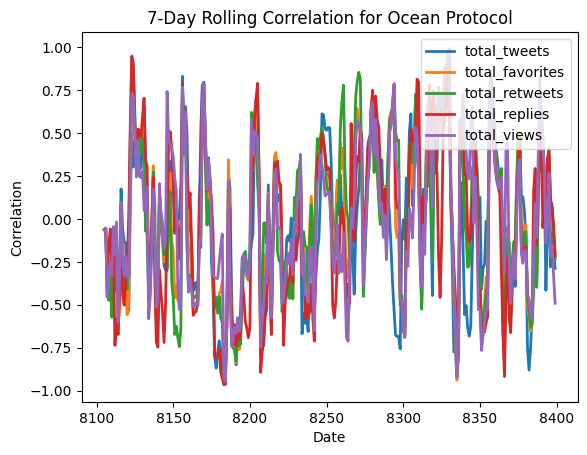

<Figure size 1400x800 with 0 Axes>

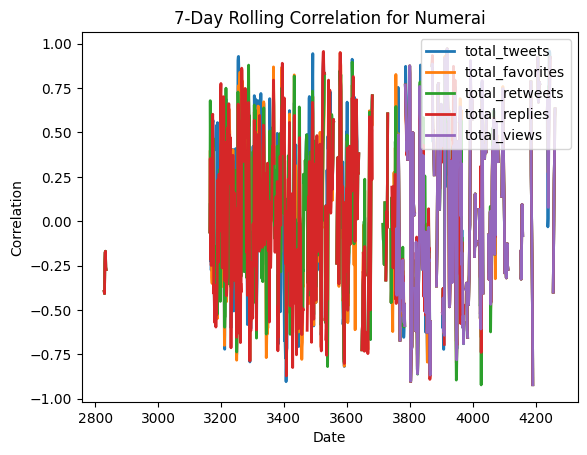

<Figure size 1400x800 with 0 Axes>

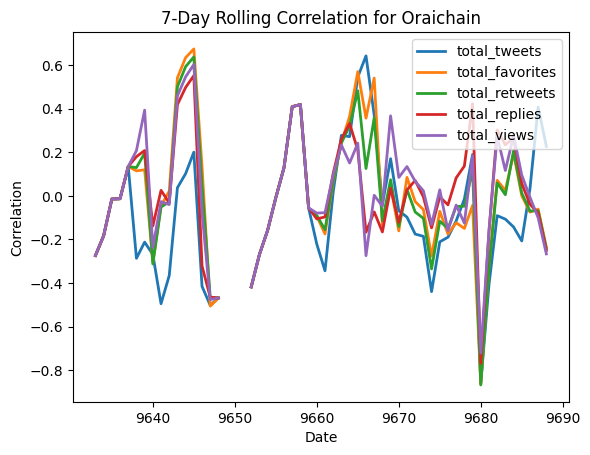

<Figure size 1400x800 with 0 Axes>

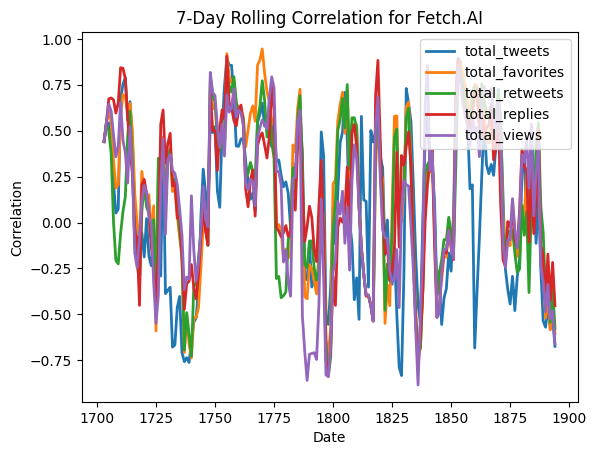

<Figure size 1400x800 with 0 Axes>

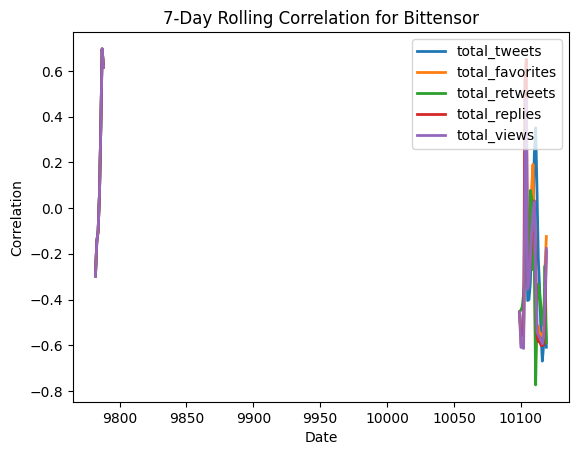

<Figure size 1400x800 with 0 Axes>

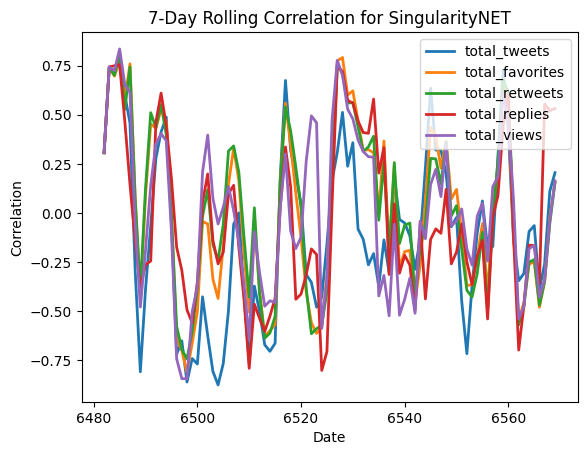

In [122]:

# Load the data
prices_df = pd.read_csv('output/prices.csv')
tweets_df = pd.read_csv('output/tweets.csv')

# Convert 'Date' columns to datetime
prices_df['Date'] = pd.to_datetime(prices_df['Date'])
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

# Aggregate tweet data by date and project
tweets_agg = tweets_df.groupby(['Project', tweets_df['created_at'].dt.date]).agg(
    total_tweets=('tweet_id', 'count'),
    total_favorites=('favorite_count', 'sum'),
    total_retweets=('retweet_count', 'sum'),
    total_replies=('reply_count', 'sum'),
    total_views=('view_count', 'sum')
).reset_index().rename(columns={'created_at': 'Date'})

# Convert 'Date' column in tweets_agg to datetime
tweets_agg['Date'] = pd.to_datetime(tweets_agg['Date'])

# Merge price and tweet data
merged_df = pd.merge(prices_df, tweets_agg, on=['Project', 'Date'], how='left')

# Fill NaN values with 0 for tweet metrics
merged_df.fillna(0, inplace=True)

# Calculate rolling correlation for each project for the past 7 days
correlation_results = {}

for project in projects:
    project_key = list(project.keys())[0]
    project_name = project[project_key]
    project_data = merged_df[merged_df['Project'] == project_key]

    rolling_corr = project_data[['Close', 'total_tweets', 'total_favorites', 'total_retweets', 'total_replies', 'total_views']].rolling(7).corr().loc[(slice(None), 'Close'), :]
    rolling_corr.index = rolling_corr.index.droplevel(1)
    correlation_results[project_name] = rolling_corr

    # Plotting
    plt.figure(figsize=(14, 8))
    rolling_corr[['total_tweets', 'total_favorites', 'total_retweets', 'total_replies', 'total_views']].plot(title=f"7-Day Rolling Correlation for {project_name}", linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Correlation')
    plt.legend(loc='upper right')
    plt.show()
